In [1]:
import SimDAT2D.SimDAT2D_MDK as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D_MDK as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
from tifffile import imread
from SimDAT2D import masking
import pyFAI.azimuthalIntegrator as AI
from scipy.ndimage import shift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [19]:
# to reload iterative changes to the code, uncomment the following lines
import importlib
sim = importlib.reload(sim)

running NMF & AggClustering on GI data

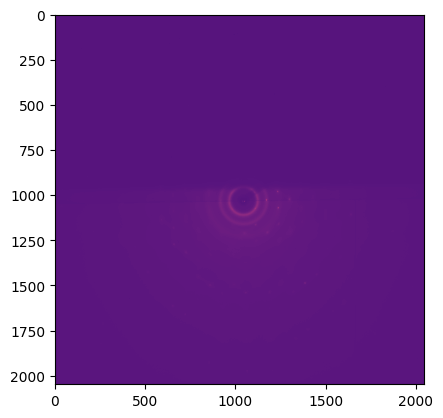

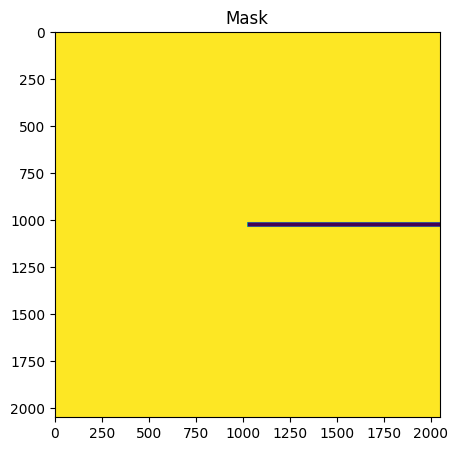

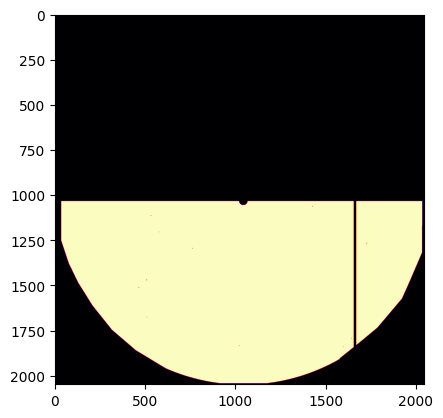

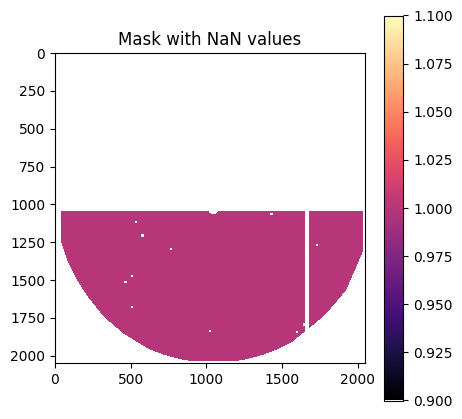

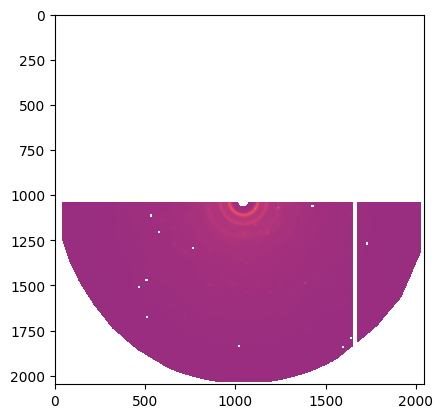

C:\Users\kelleymarisa\PythonProjects\SimDAT2D\SimDAT2D\SimDAT2D\SimDAT2D_MDK.py:317: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(window)


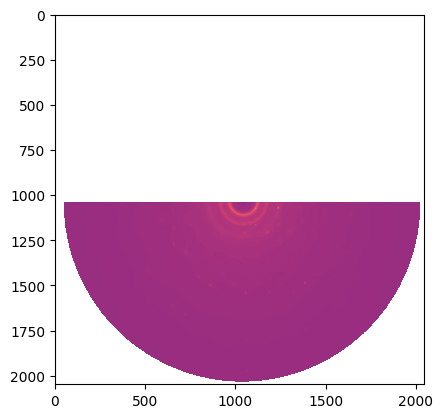

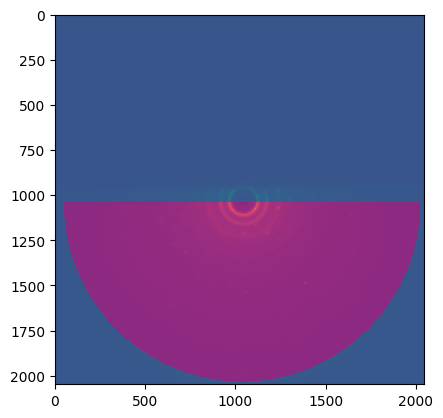

In [3]:
GST_6C_real_0035 = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\p21p1\gits_a_GST_6C_real\gits_a_GST_6C_real_45_mdeg-00035.tif'
GST_6C_real_0035_image = imread(GST_6C_real_0035)
#check image
plt.imshow(GST_6C_real_0035_image, cmap = 'magma')
plt.show()
#create integration mask
mask_12 = sim.create_mask_for_tiff(GST_6C_real_0035, 12)

#load image mask
gz_mask_path = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\p21p1\Masks\mask_circle_edge_corrected.npy'
gz_mask = np.load(gz_mask_path)
# Invert the mask (0s become 1s and 1s become 0s)
gz_inverted_mask = 1 - gz_mask  # or: np.logical_not(mask_12).astype(float)
#check mask
plt.imshow(gz_inverted_mask, cmap = 'magma')
plt.show()

# turned zeros to NaN in invertedpyfai mask
# Convert zeros to NaN
gz_mask_with_nan = gz_inverted_mask.astype(float)  # Convert to float type first since NaN requires float
gz_mask_with_nan[gz_inverted_mask == 0] = np.nan
# Visualize to verify
plt.figure(figsize=(5, 5))
plt.imshow(gz_mask_with_nan, cmap='magma')
plt.title('Mask with NaN values')
plt.colorbar()
plt.show()

gz_combined_image = GST_6C_real_0035_image + gz_mask_with_nan
plt.imshow(gz_combined_image, cmap = 'magma')
plt.show()

gz_filled_with_mean = sim.fill_nan_with_neighbor_mean_circle(gz_combined_image, radius = 992, center = (1048, 1035))
plt.imshow(gz_filled_with_mean, cmap = 'magma')
plt.show()

mask_12_invert = 1-mask_12
mask_12_nan = mask_12_invert.astype(float)
mask_12_nan[mask_12_invert == 0] = np.nan

gz_mask_combined = GST_6C_real_0035_image + mask_12
plt.imshow(gz_mask_combined)
plt.show

polarized_gz_image = sim.apply_polarization(gz_filled_with_mean, 0.40008, center=None, polarization_factor=0.1)
#check image
plt.imshow(polarized_gz_image, cmap = 'magma')
plt.show()

Found NaN values in original image, replacing with 0
Cleaned image:
Shape: (2048, 2048)
Min value: -432639.0
Max value: 611268.0
Number of non-zero pixels: 1614107

Shifted image:
Shape: (2048, 2048)
Min value: -432639.0
Max value: 611268.0
Number of non-zero pixels: 1618152


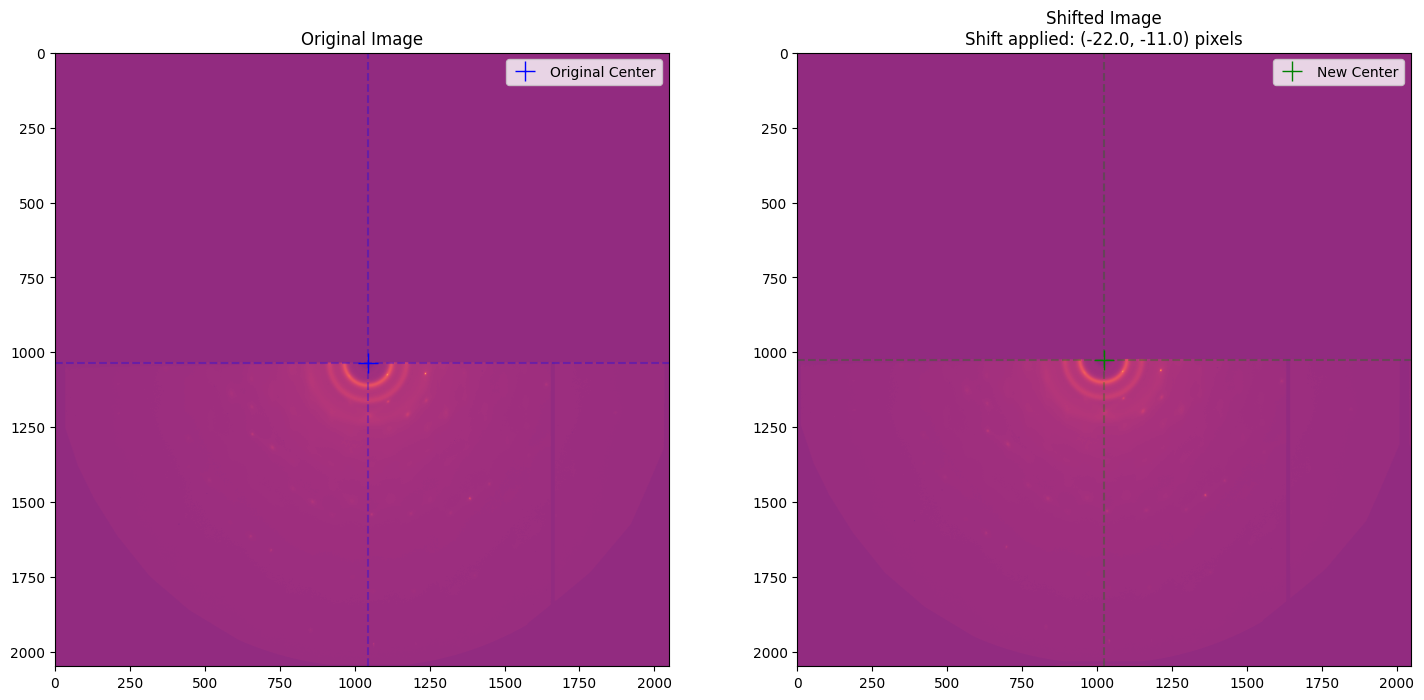

Shift applied: dx=-22.0, dy=-11.0 pixels
(2048, 2048)


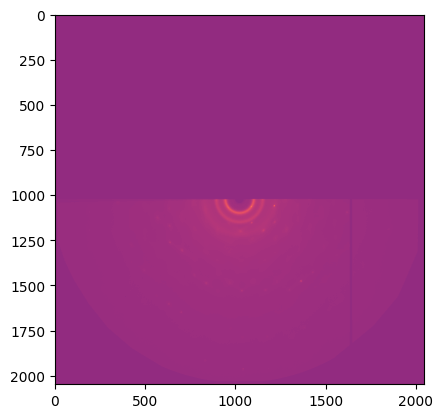

In [4]:
# Define current beam center
current_center = (1046, 1035)  
# Apply the shift
gz_shifted_image, shift_applied = sim.center_shift_image(image=gz_combined_image, current_center=current_center, target_center=(1024, 1024))
print(gz_combined_image.shape)
plt.imshow(gz_shifted_image, cmap = 'magma')
plt.show()

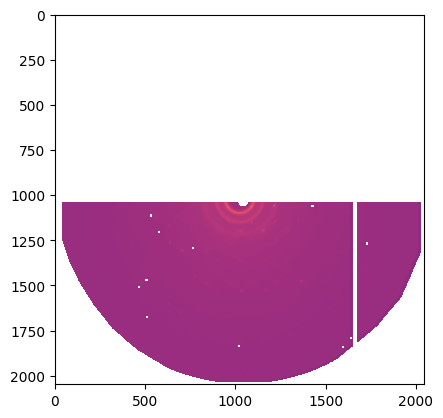

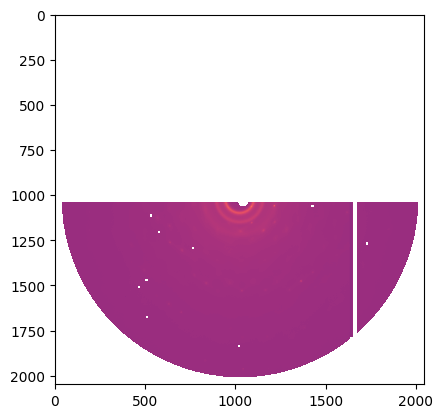

In [5]:
gz_combined_shifted = gz_shifted_image + gz_mask_with_nan
plt.imshow(gz_combined_shifted, cmap = 'magma')
plt.show()
gz_shifted_image = sim.mask_circle_nan_edge(gz_combined_shifted, radius = 992, center = (1024, 1024))
plt.imshow(gz_shifted_image, cmap = 'magma')
plt.show()

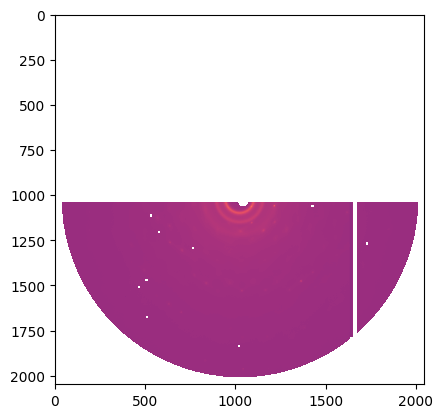

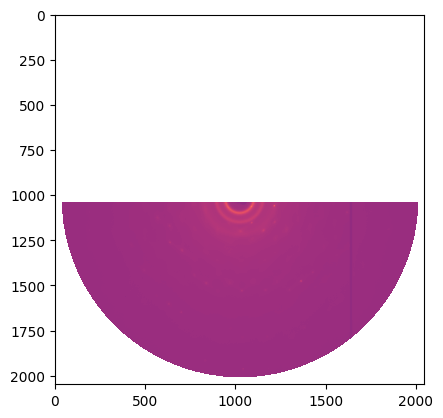

In [6]:
gz_combined_shifted = gz_shifted_image + gz_mask_with_nan
plt.imshow(gz_combined_shifted, cmap = 'magma')
plt.show()
gz_shifted_image_filled = sim.fill_nan_with_neighbor_mean_circle(gz_combined_shifted, radius = 992, center = (1024, 1024))
plt.imshow(gz_shifted_image_filled, cmap = 'magma')
plt.show()

Starting rotate_and_integrate function
Will show visualizations every 36 steps

Processing angle 1/180: 180.000 degrees


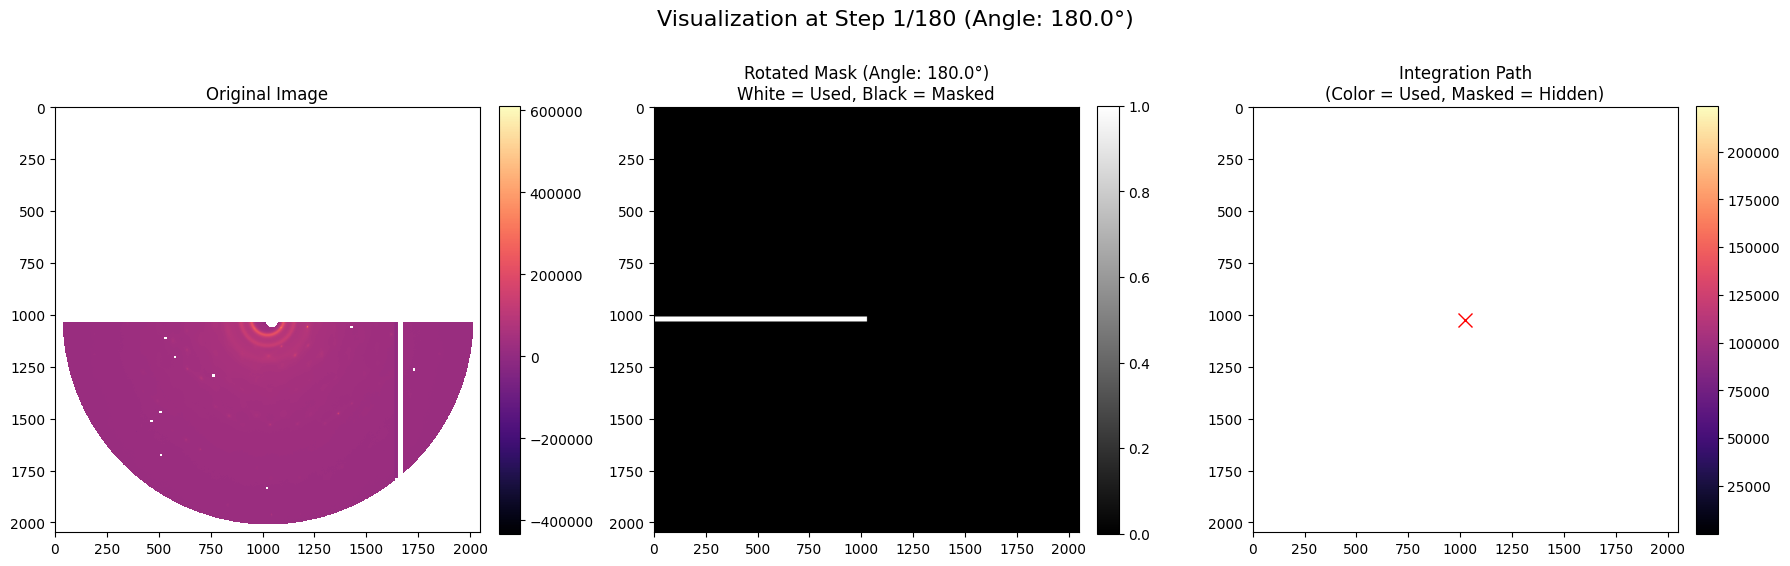


Processing angle 2/180: 181.000 degrees

Processing angle 3/180: 182.000 degrees

Processing angle 4/180: 183.000 degrees

Processing angle 5/180: 184.000 degrees

Processing angle 6/180: 185.000 degrees

Processing angle 7/180: 186.000 degrees

Processing angle 8/180: 187.000 degrees

Processing angle 9/180: 188.000 degrees

Processing angle 10/180: 189.000 degrees

Processing angle 11/180: 190.000 degrees

Processing angle 12/180: 191.000 degrees

Processing angle 13/180: 192.000 degrees

Processing angle 14/180: 193.000 degrees

Processing angle 15/180: 194.000 degrees

Processing angle 16/180: 195.000 degrees

Processing angle 17/180: 196.000 degrees

Processing angle 18/180: 197.000 degrees
Completed 18/180 integrations (10.0%)

Processing angle 19/180: 198.000 degrees

Processing angle 20/180: 199.000 degrees

Processing angle 21/180: 200.000 degrees

Processing angle 22/180: 201.000 degrees

Processing angle 23/180: 202.000 degrees

Processing angle 24/180: 203.000 degrees

Pro

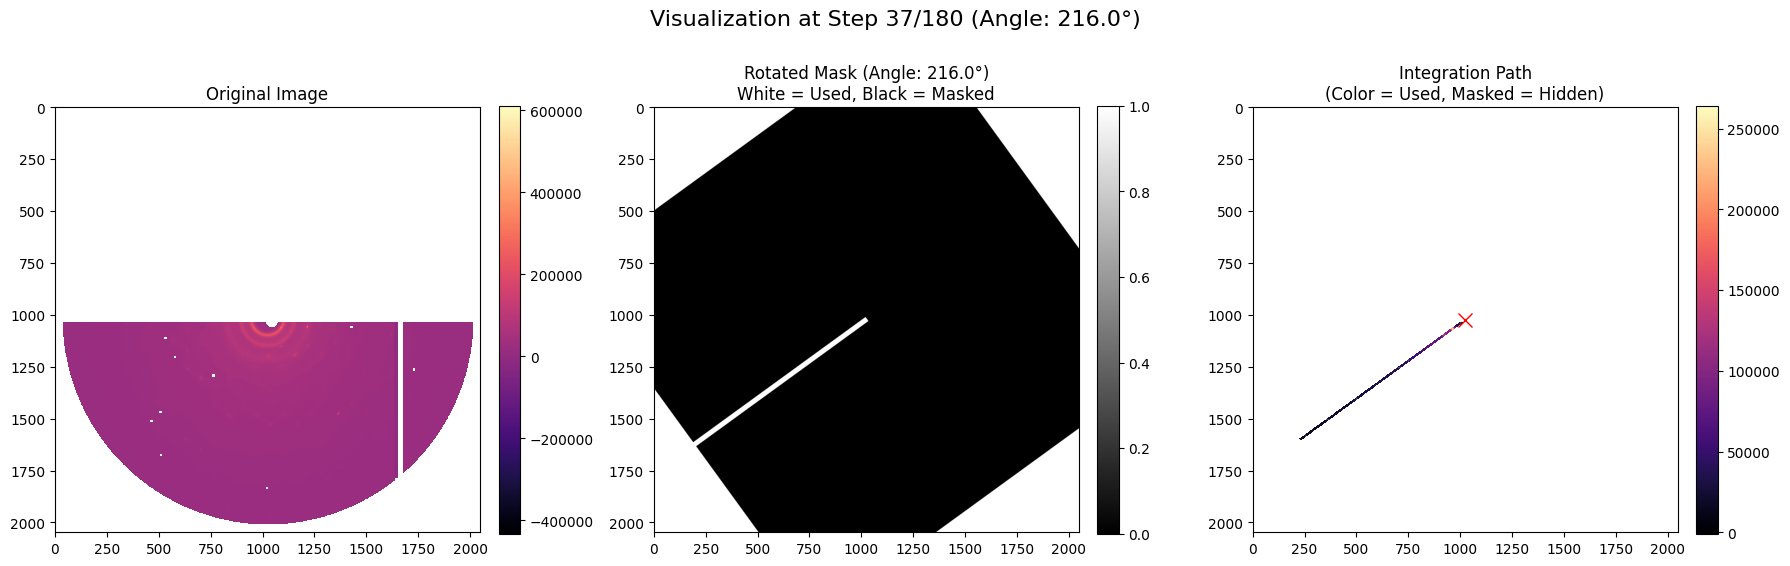


Processing angle 38/180: 217.000 degrees

Processing angle 39/180: 218.000 degrees

Processing angle 40/180: 219.000 degrees

Processing angle 41/180: 220.000 degrees

Processing angle 42/180: 221.000 degrees

Processing angle 43/180: 222.000 degrees

Processing angle 44/180: 223.000 degrees

Processing angle 45/180: 224.000 degrees

Processing angle 46/180: 225.000 degrees

Processing angle 47/180: 226.000 degrees

Processing angle 48/180: 227.000 degrees

Processing angle 49/180: 228.000 degrees

Processing angle 50/180: 229.000 degrees

Processing angle 51/180: 230.000 degrees

Processing angle 52/180: 231.000 degrees

Processing angle 53/180: 232.000 degrees

Processing angle 54/180: 233.000 degrees
Completed 54/180 integrations (30.0%)

Processing angle 55/180: 234.000 degrees

Processing angle 56/180: 235.000 degrees

Processing angle 57/180: 236.000 degrees

Processing angle 58/180: 237.000 degrees

Processing angle 59/180: 238.000 degrees

Processing angle 60/180: 239.000 degr

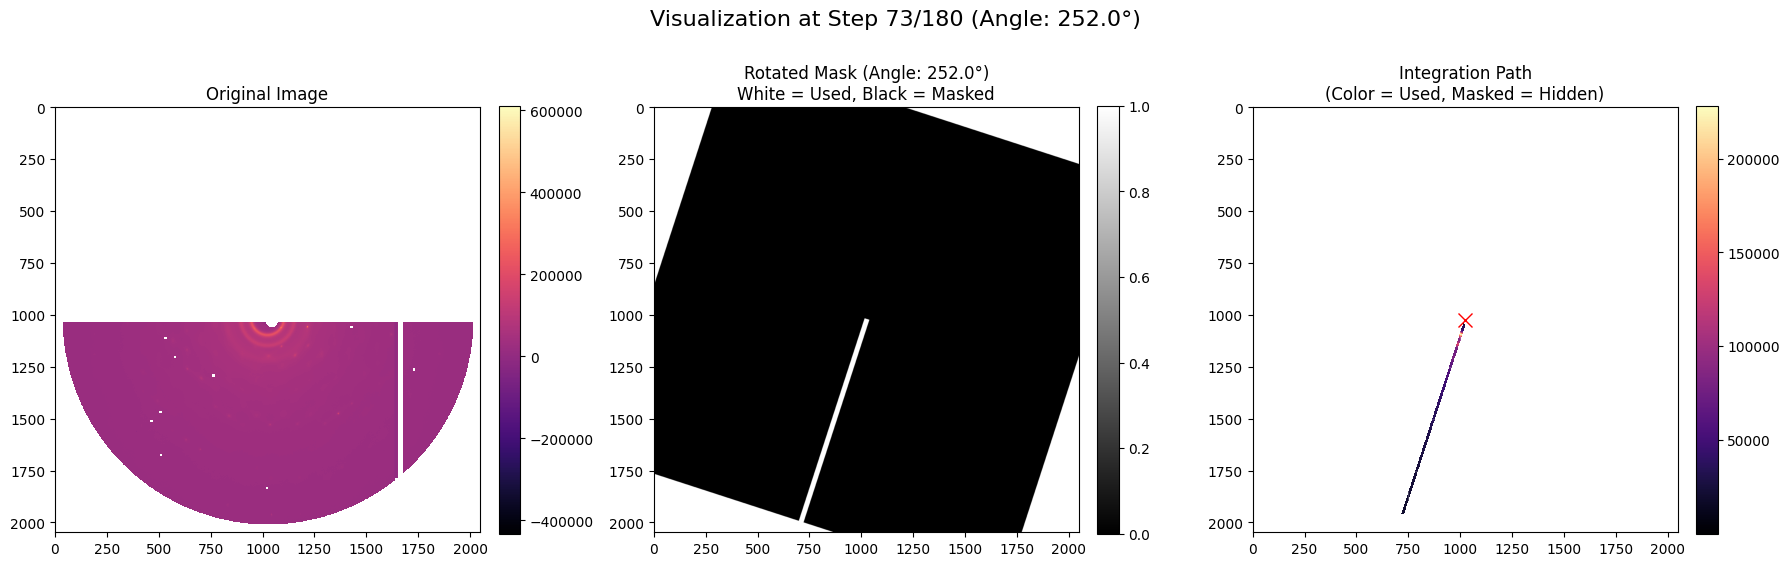


Processing angle 74/180: 253.000 degrees

Processing angle 75/180: 254.000 degrees

Processing angle 76/180: 255.000 degrees

Processing angle 77/180: 256.000 degrees

Processing angle 78/180: 257.000 degrees

Processing angle 79/180: 258.000 degrees

Processing angle 80/180: 259.000 degrees

Processing angle 81/180: 260.000 degrees

Processing angle 82/180: 261.000 degrees

Processing angle 83/180: 262.000 degrees

Processing angle 84/180: 263.000 degrees

Processing angle 85/180: 264.000 degrees

Processing angle 86/180: 265.000 degrees

Processing angle 87/180: 266.000 degrees

Processing angle 88/180: 267.000 degrees

Processing angle 89/180: 268.000 degrees

Processing angle 90/180: 269.000 degrees
Completed 90/180 integrations (50.0%)

Processing angle 91/180: 270.000 degrees

Processing angle 92/180: 271.000 degrees

Processing angle 93/180: 272.000 degrees

Processing angle 94/180: 273.000 degrees

Processing angle 95/180: 274.000 degrees

Processing angle 96/180: 275.000 degr

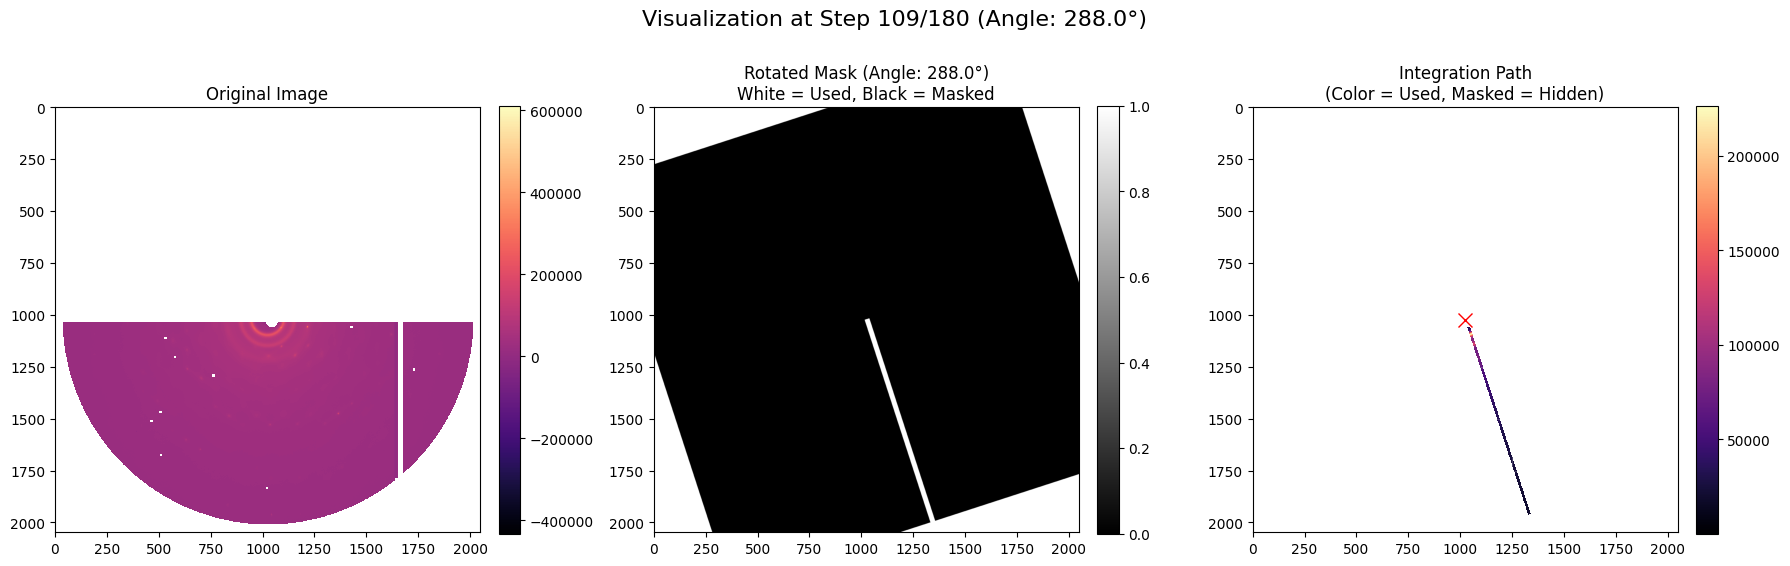


Processing angle 110/180: 289.000 degrees

Processing angle 111/180: 290.000 degrees

Processing angle 112/180: 291.000 degrees

Processing angle 113/180: 292.000 degrees

Processing angle 114/180: 293.000 degrees

Processing angle 115/180: 294.000 degrees

Processing angle 116/180: 295.000 degrees

Processing angle 117/180: 296.000 degrees

Processing angle 118/180: 297.000 degrees

Processing angle 119/180: 298.000 degrees

Processing angle 120/180: 299.000 degrees

Processing angle 121/180: 300.000 degrees

Processing angle 122/180: 301.000 degrees

Processing angle 123/180: 302.000 degrees

Processing angle 124/180: 303.000 degrees

Processing angle 125/180: 304.000 degrees

Processing angle 126/180: 305.000 degrees
Completed 126/180 integrations (70.0%)

Processing angle 127/180: 306.000 degrees

Processing angle 128/180: 307.000 degrees

Processing angle 129/180: 308.000 degrees

Processing angle 130/180: 309.000 degrees

Processing angle 131/180: 310.000 degrees

Processing ang

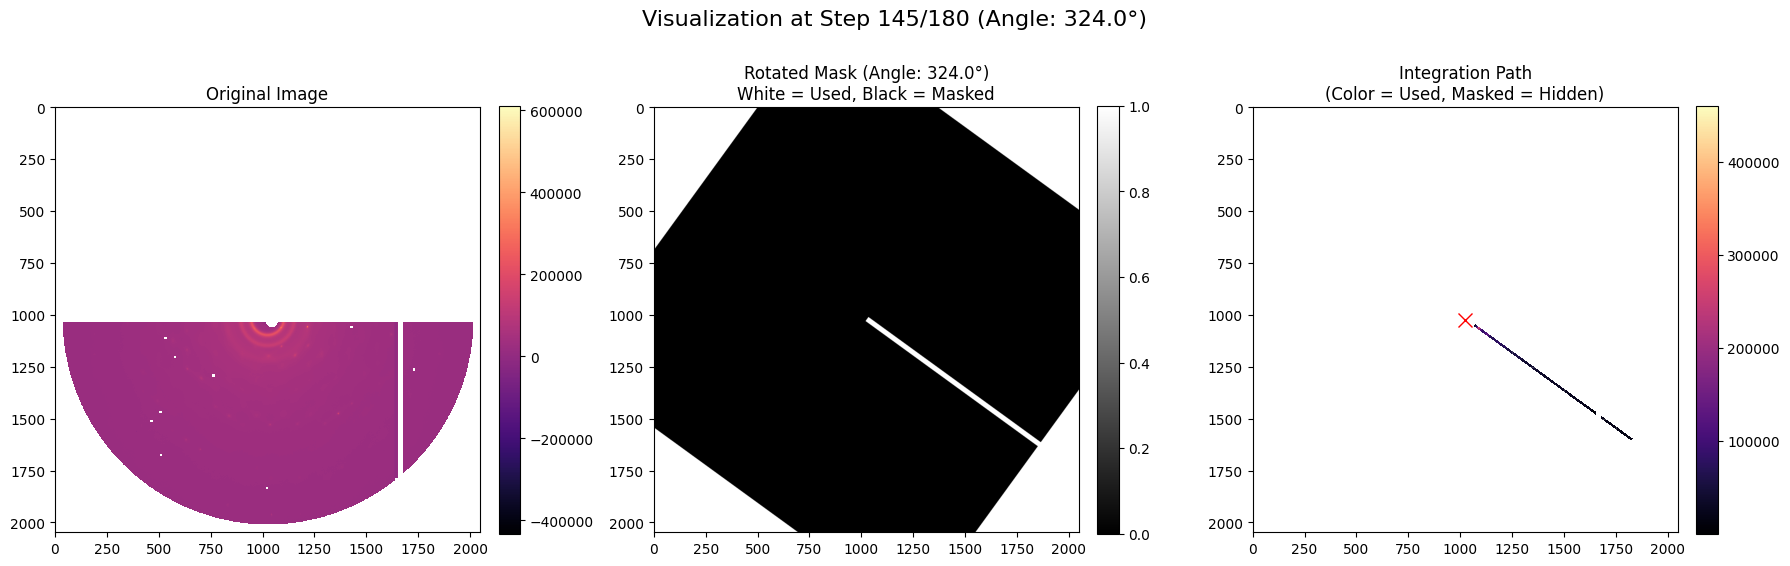


Processing angle 146/180: 325.000 degrees

Processing angle 147/180: 326.000 degrees

Processing angle 148/180: 327.000 degrees

Processing angle 149/180: 328.000 degrees

Processing angle 150/180: 329.000 degrees

Processing angle 151/180: 330.000 degrees

Processing angle 152/180: 331.000 degrees

Processing angle 153/180: 332.000 degrees

Processing angle 154/180: 333.000 degrees

Processing angle 155/180: 334.000 degrees

Processing angle 156/180: 335.000 degrees

Processing angle 157/180: 336.000 degrees

Processing angle 158/180: 337.000 degrees

Processing angle 159/180: 338.000 degrees

Processing angle 160/180: 339.000 degrees

Processing angle 161/180: 340.000 degrees

Processing angle 162/180: 341.000 degrees
Completed 162/180 integrations (90.0%)

Processing angle 163/180: 342.000 degrees

Processing angle 164/180: 343.000 degrees

Processing angle 165/180: 344.000 degrees

Processing angle 166/180: 345.000 degrees

Processing angle 167/180: 346.000 degrees

Processing ang

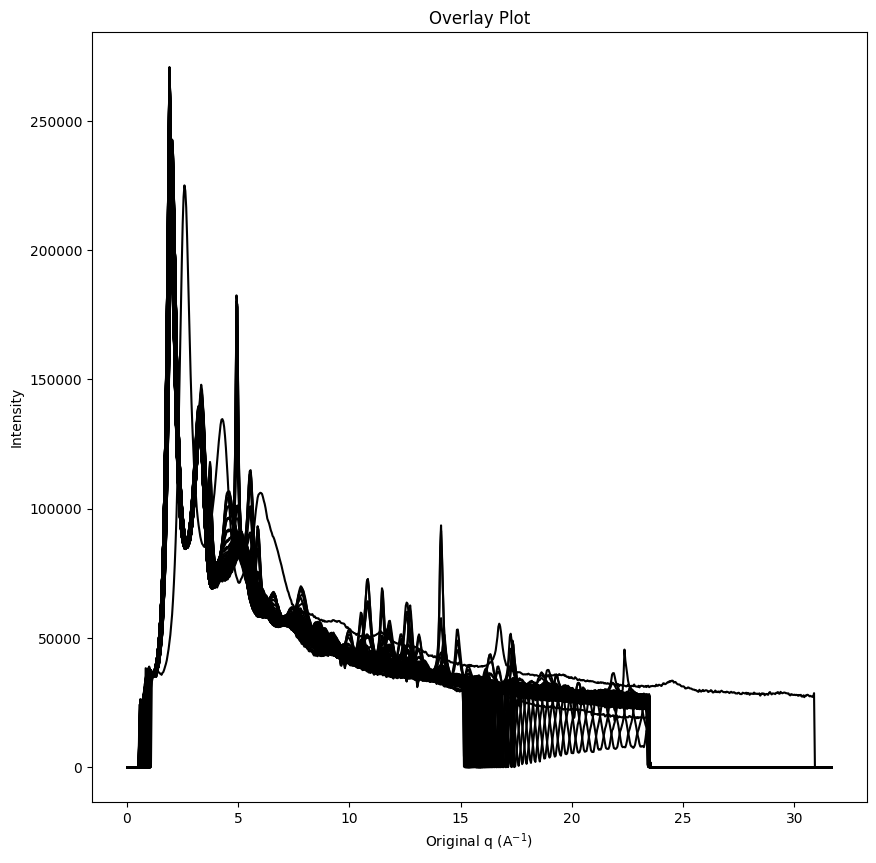

In [16]:
q, GST_6C_real_0035_maskint = sim.rotate_and_integrate_mask_printout(gz_shifted_image, 1, .40008, 1.22212e-11, resolution = 800, mask = mask_12, intermediate_steps = 5)

Starting rotate_and_integrate function
Will show visualizations every 36 steps

Processing angle 1/180: 180.000 degrees


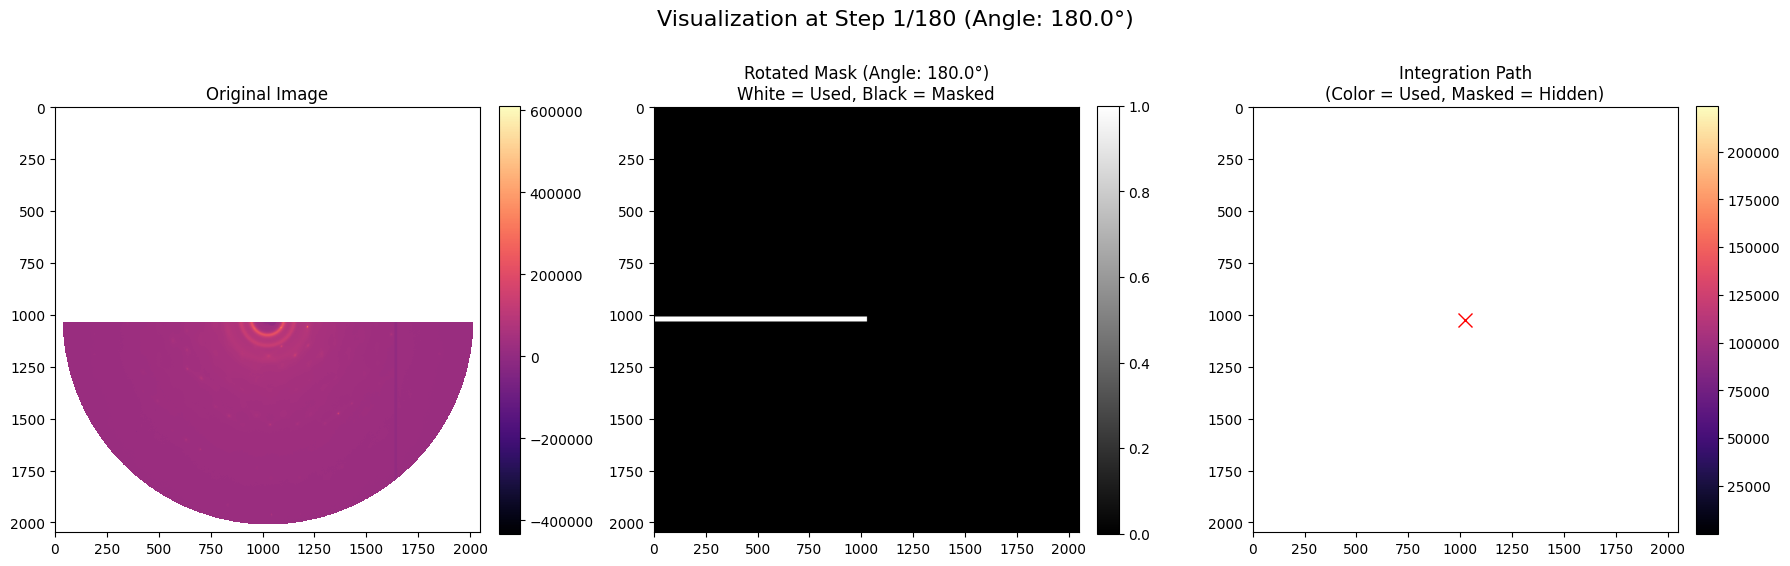


Processing angle 2/180: 181.000 degrees

Processing angle 3/180: 182.000 degrees

Processing angle 4/180: 183.000 degrees

Processing angle 5/180: 184.000 degrees

Processing angle 6/180: 185.000 degrees

Processing angle 7/180: 186.000 degrees

Processing angle 8/180: 187.000 degrees

Processing angle 9/180: 188.000 degrees

Processing angle 10/180: 189.000 degrees

Processing angle 11/180: 190.000 degrees

Processing angle 12/180: 191.000 degrees

Processing angle 13/180: 192.000 degrees

Processing angle 14/180: 193.000 degrees

Processing angle 15/180: 194.000 degrees

Processing angle 16/180: 195.000 degrees

Processing angle 17/180: 196.000 degrees

Processing angle 18/180: 197.000 degrees
Completed 18/180 integrations (10.0%)

Processing angle 19/180: 198.000 degrees

Processing angle 20/180: 199.000 degrees

Processing angle 21/180: 200.000 degrees

Processing angle 22/180: 201.000 degrees

Processing angle 23/180: 202.000 degrees

Processing angle 24/180: 203.000 degrees

Pro

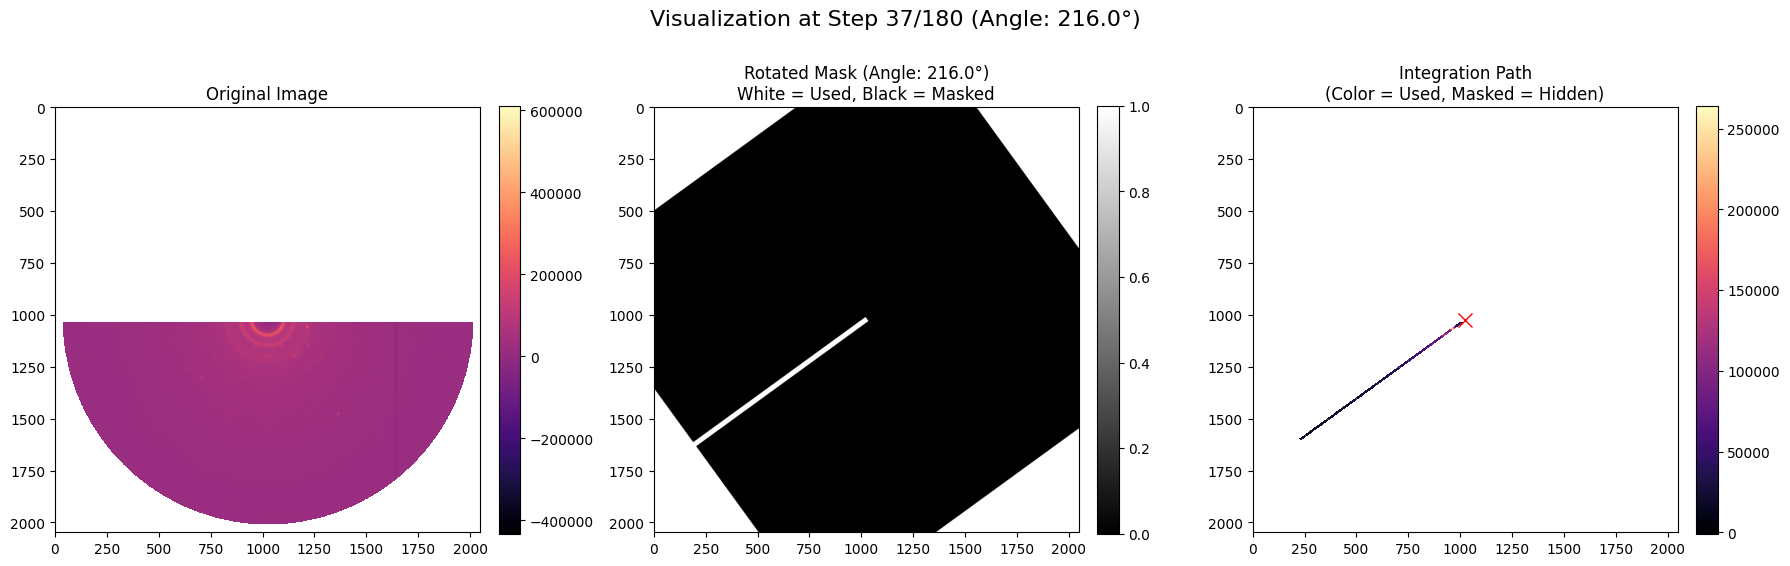


Processing angle 38/180: 217.000 degrees

Processing angle 39/180: 218.000 degrees

Processing angle 40/180: 219.000 degrees

Processing angle 41/180: 220.000 degrees

Processing angle 42/180: 221.000 degrees

Processing angle 43/180: 222.000 degrees

Processing angle 44/180: 223.000 degrees

Processing angle 45/180: 224.000 degrees

Processing angle 46/180: 225.000 degrees

Processing angle 47/180: 226.000 degrees

Processing angle 48/180: 227.000 degrees

Processing angle 49/180: 228.000 degrees

Processing angle 50/180: 229.000 degrees

Processing angle 51/180: 230.000 degrees

Processing angle 52/180: 231.000 degrees

Processing angle 53/180: 232.000 degrees

Processing angle 54/180: 233.000 degrees
Completed 54/180 integrations (30.0%)

Processing angle 55/180: 234.000 degrees

Processing angle 56/180: 235.000 degrees

Processing angle 57/180: 236.000 degrees

Processing angle 58/180: 237.000 degrees

Processing angle 59/180: 238.000 degrees

Processing angle 60/180: 239.000 degr

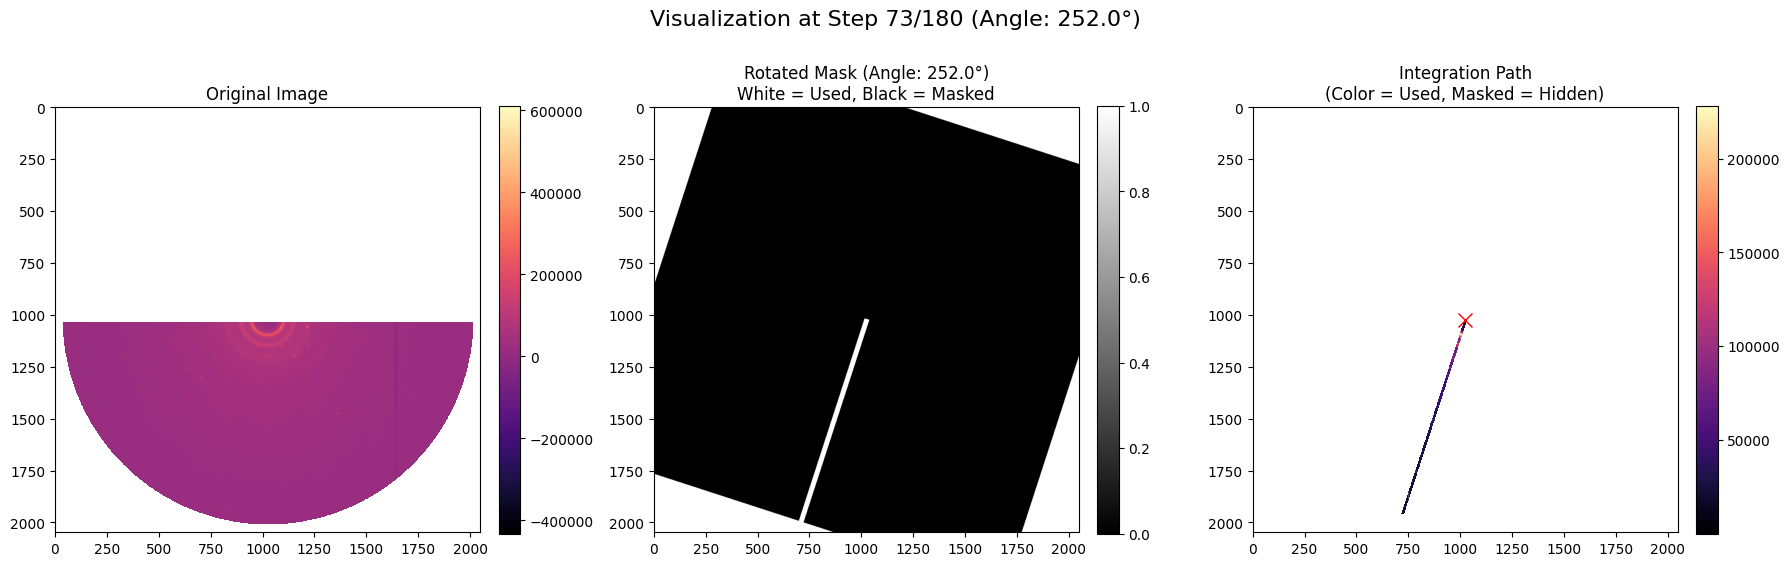


Processing angle 74/180: 253.000 degrees

Processing angle 75/180: 254.000 degrees

Processing angle 76/180: 255.000 degrees

Processing angle 77/180: 256.000 degrees

Processing angle 78/180: 257.000 degrees

Processing angle 79/180: 258.000 degrees

Processing angle 80/180: 259.000 degrees

Processing angle 81/180: 260.000 degrees

Processing angle 82/180: 261.000 degrees

Processing angle 83/180: 262.000 degrees

Processing angle 84/180: 263.000 degrees

Processing angle 85/180: 264.000 degrees

Processing angle 86/180: 265.000 degrees

Processing angle 87/180: 266.000 degrees

Processing angle 88/180: 267.000 degrees

Processing angle 89/180: 268.000 degrees

Processing angle 90/180: 269.000 degrees
Completed 90/180 integrations (50.0%)

Processing angle 91/180: 270.000 degrees

Processing angle 92/180: 271.000 degrees

Processing angle 93/180: 272.000 degrees

Processing angle 94/180: 273.000 degrees

Processing angle 95/180: 274.000 degrees

Processing angle 96/180: 275.000 degr

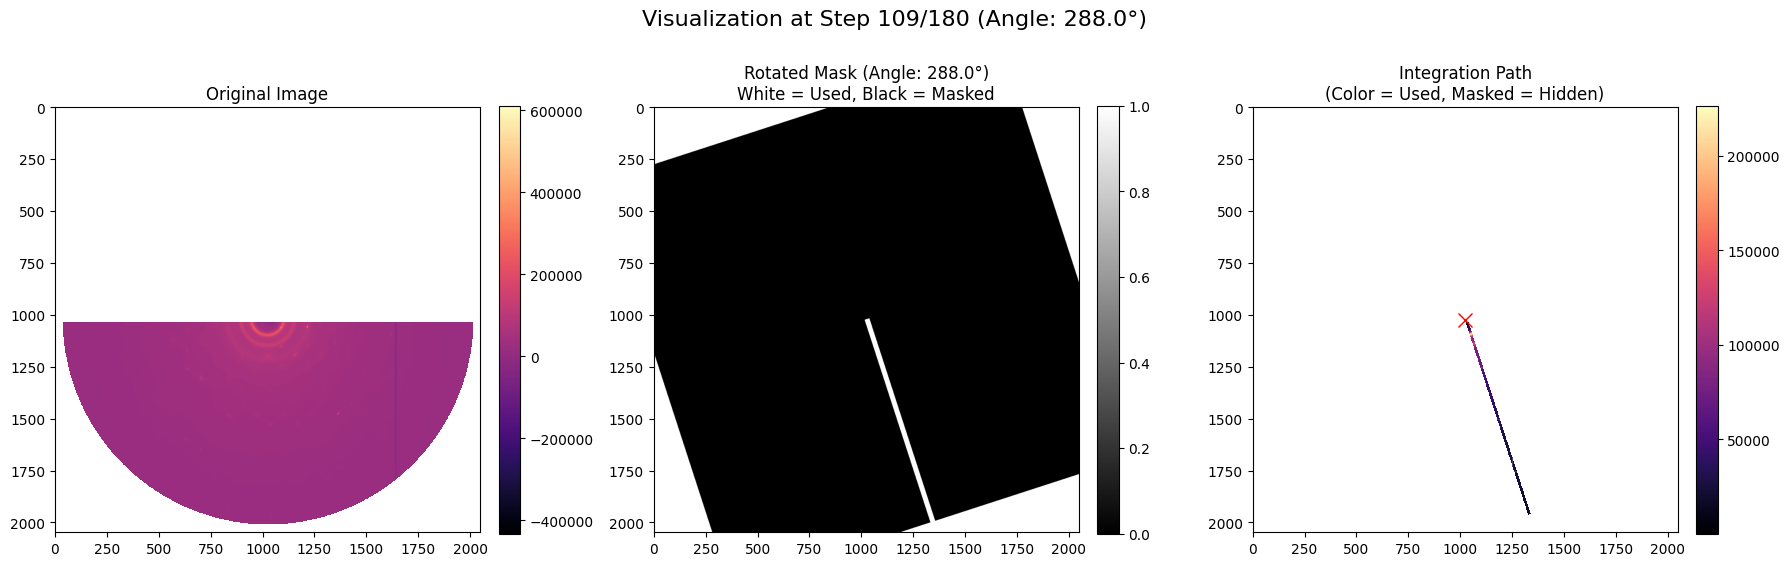


Processing angle 110/180: 289.000 degrees

Processing angle 111/180: 290.000 degrees

Processing angle 112/180: 291.000 degrees

Processing angle 113/180: 292.000 degrees

Processing angle 114/180: 293.000 degrees

Processing angle 115/180: 294.000 degrees

Processing angle 116/180: 295.000 degrees

Processing angle 117/180: 296.000 degrees

Processing angle 118/180: 297.000 degrees

Processing angle 119/180: 298.000 degrees

Processing angle 120/180: 299.000 degrees

Processing angle 121/180: 300.000 degrees

Processing angle 122/180: 301.000 degrees

Processing angle 123/180: 302.000 degrees

Processing angle 124/180: 303.000 degrees

Processing angle 125/180: 304.000 degrees

Processing angle 126/180: 305.000 degrees
Completed 126/180 integrations (70.0%)

Processing angle 127/180: 306.000 degrees

Processing angle 128/180: 307.000 degrees

Processing angle 129/180: 308.000 degrees

Processing angle 130/180: 309.000 degrees

Processing angle 131/180: 310.000 degrees

Processing ang

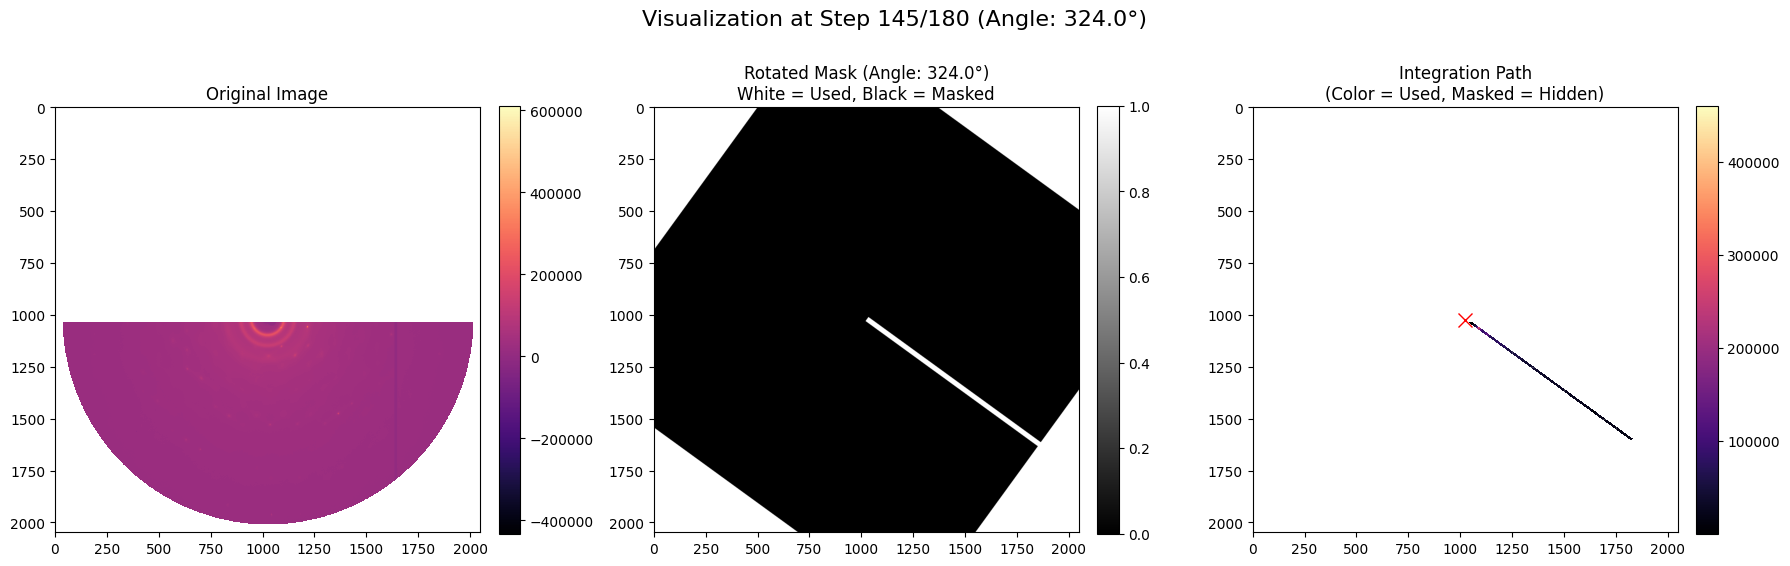


Processing angle 146/180: 325.000 degrees

Processing angle 147/180: 326.000 degrees

Processing angle 148/180: 327.000 degrees

Processing angle 149/180: 328.000 degrees

Processing angle 150/180: 329.000 degrees

Processing angle 151/180: 330.000 degrees

Processing angle 152/180: 331.000 degrees

Processing angle 153/180: 332.000 degrees

Processing angle 154/180: 333.000 degrees

Processing angle 155/180: 334.000 degrees

Processing angle 156/180: 335.000 degrees

Processing angle 157/180: 336.000 degrees

Processing angle 158/180: 337.000 degrees

Processing angle 159/180: 338.000 degrees

Processing angle 160/180: 339.000 degrees

Processing angle 161/180: 340.000 degrees

Processing angle 162/180: 341.000 degrees
Completed 162/180 integrations (90.0%)

Processing angle 163/180: 342.000 degrees

Processing angle 164/180: 343.000 degrees

Processing angle 165/180: 344.000 degrees

Processing angle 166/180: 345.000 degrees

Processing angle 167/180: 346.000 degrees

Processing ang

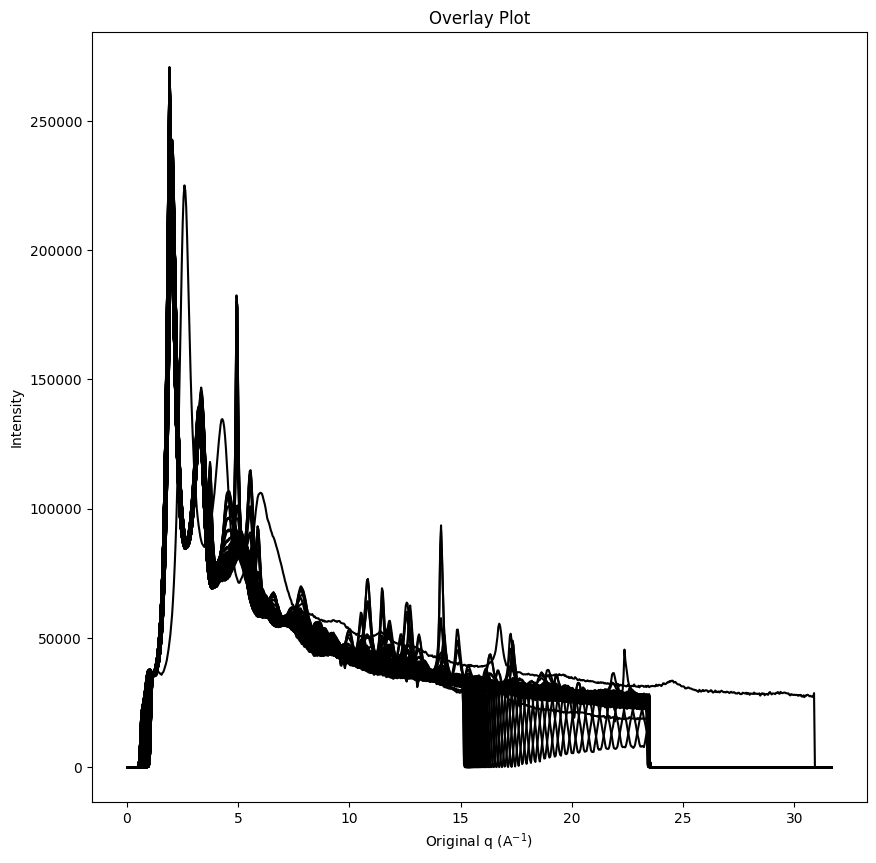

In [17]:
q, GST_6C_real_0035_maskint_fill = sim.rotate_and_integrate_mask_printout(gz_shifted_image_filled, 1, .40008, 1.22212e-11, resolution = 800, mask = mask_12, intermediate_steps = 5)

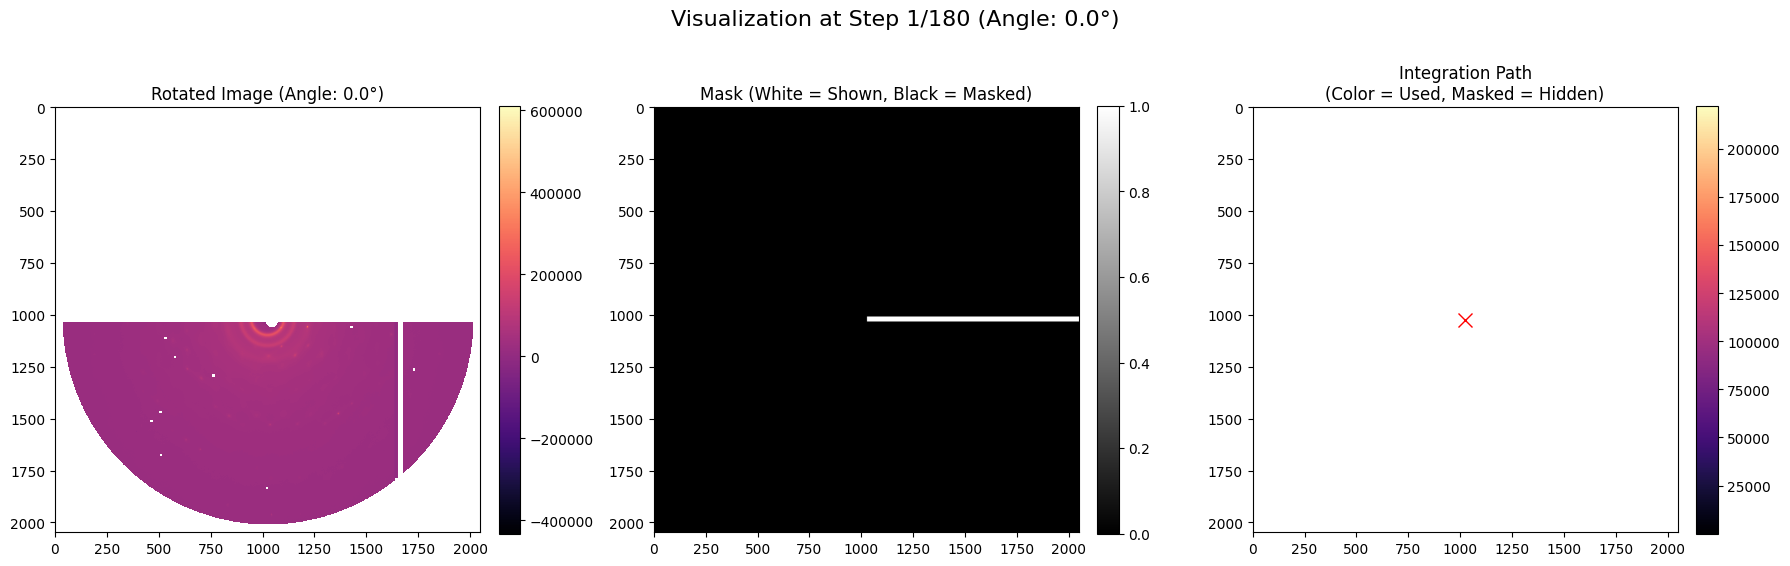

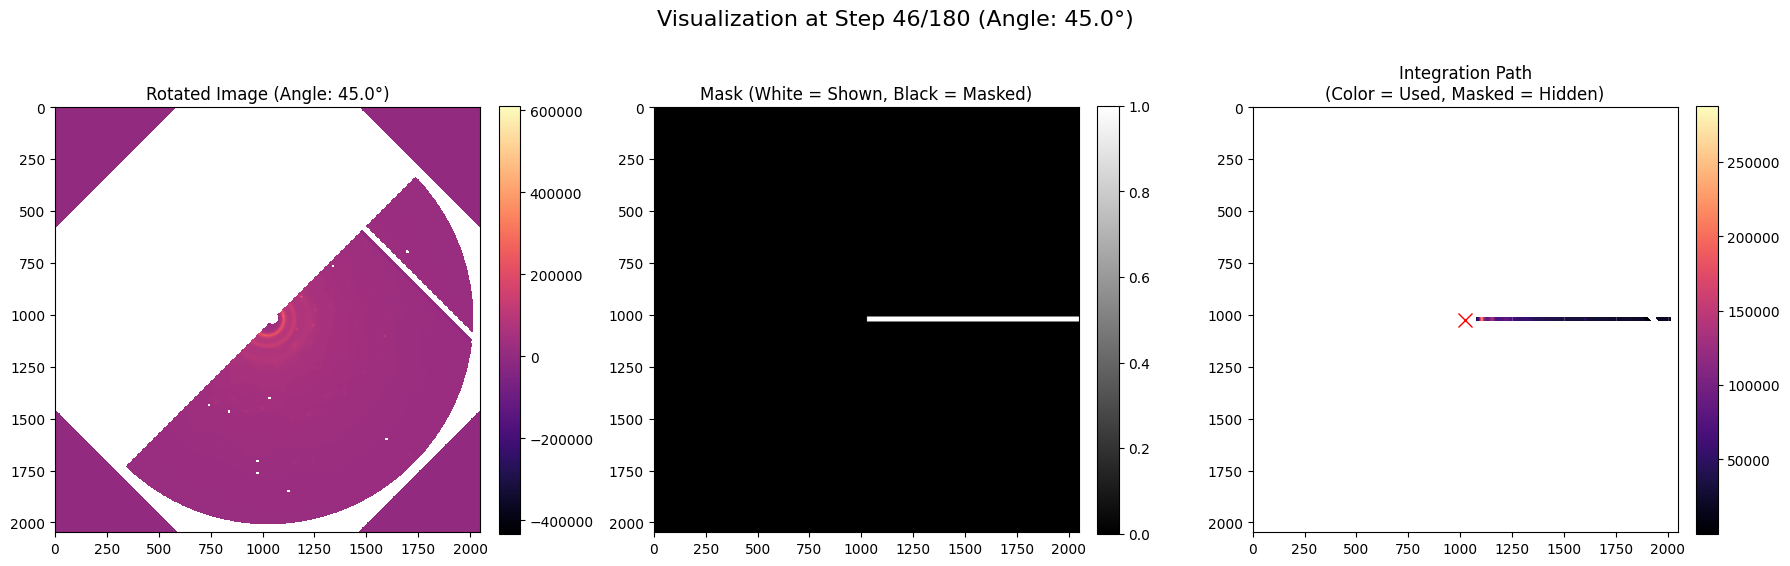

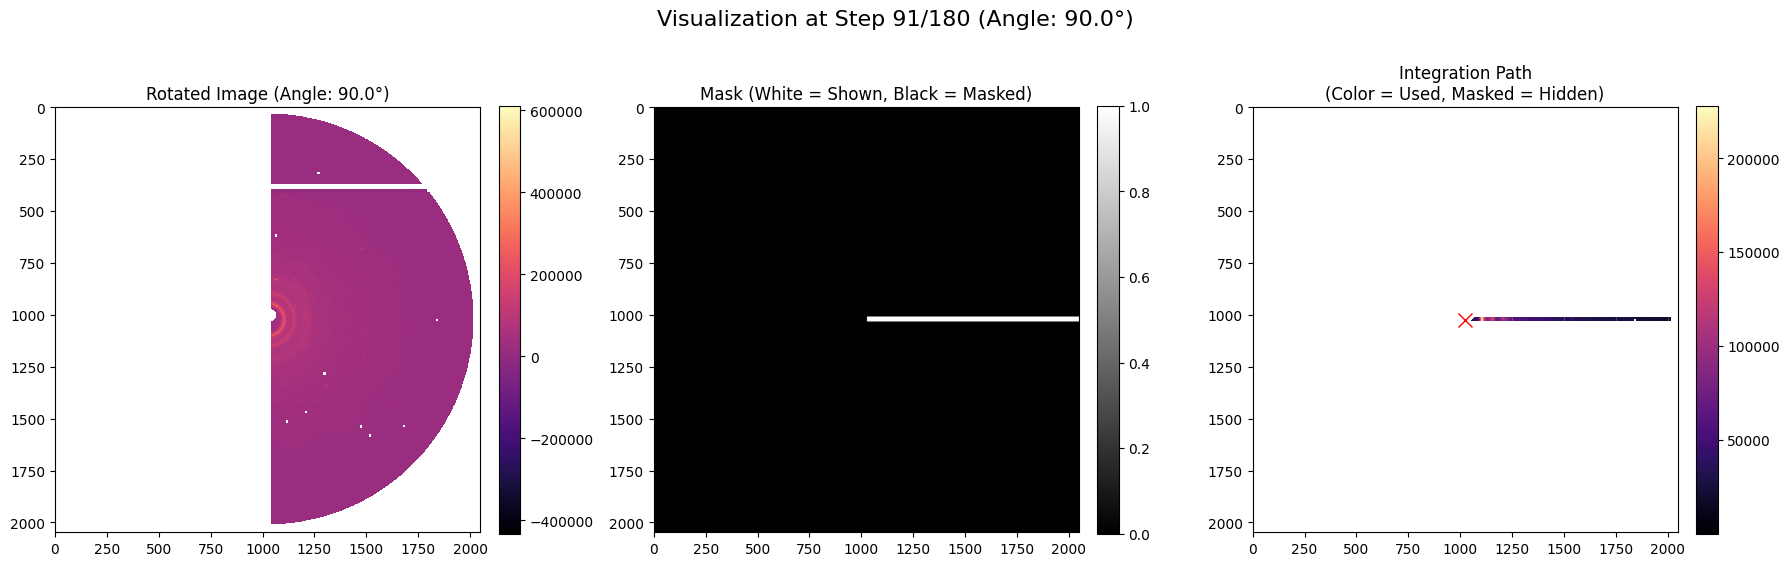

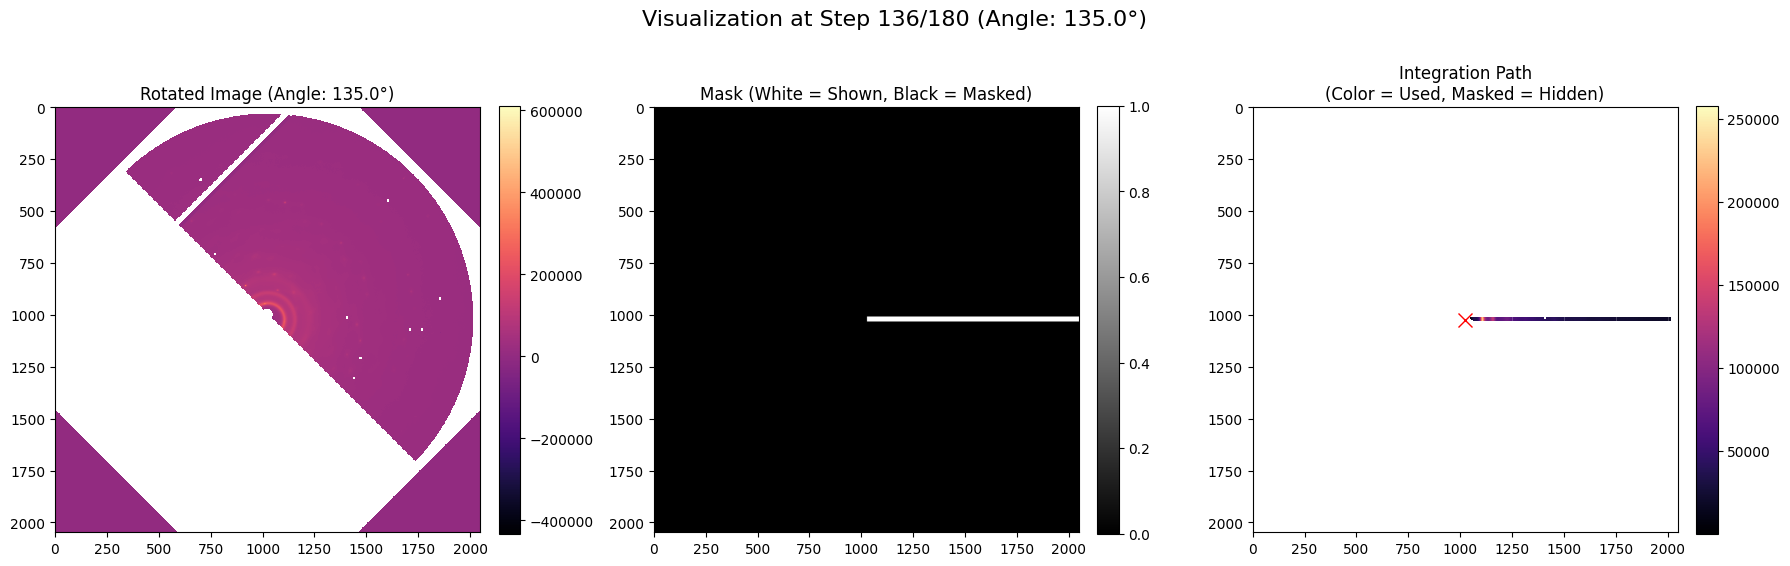

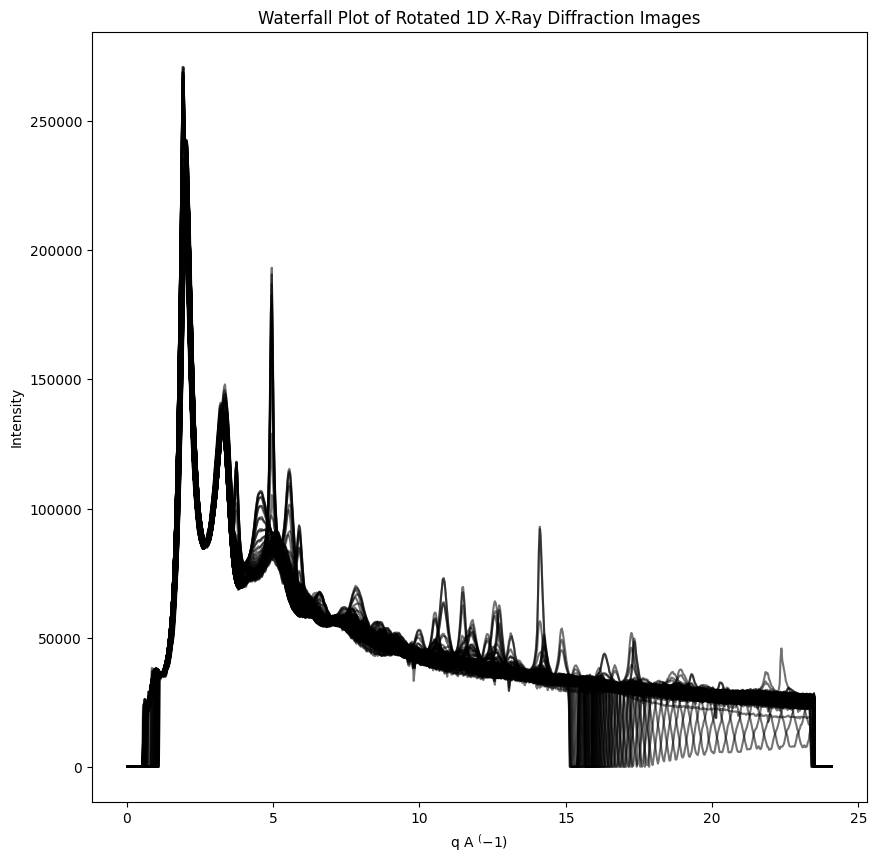

In [20]:
q, GST_6C_real_0035_int = sim.rotate_and_integrate_printout(gz_shifted_image, 1, .40008, 1.22212e-11, resolution = 800, mask = mask_12, center = None, visualization_interval = 45)

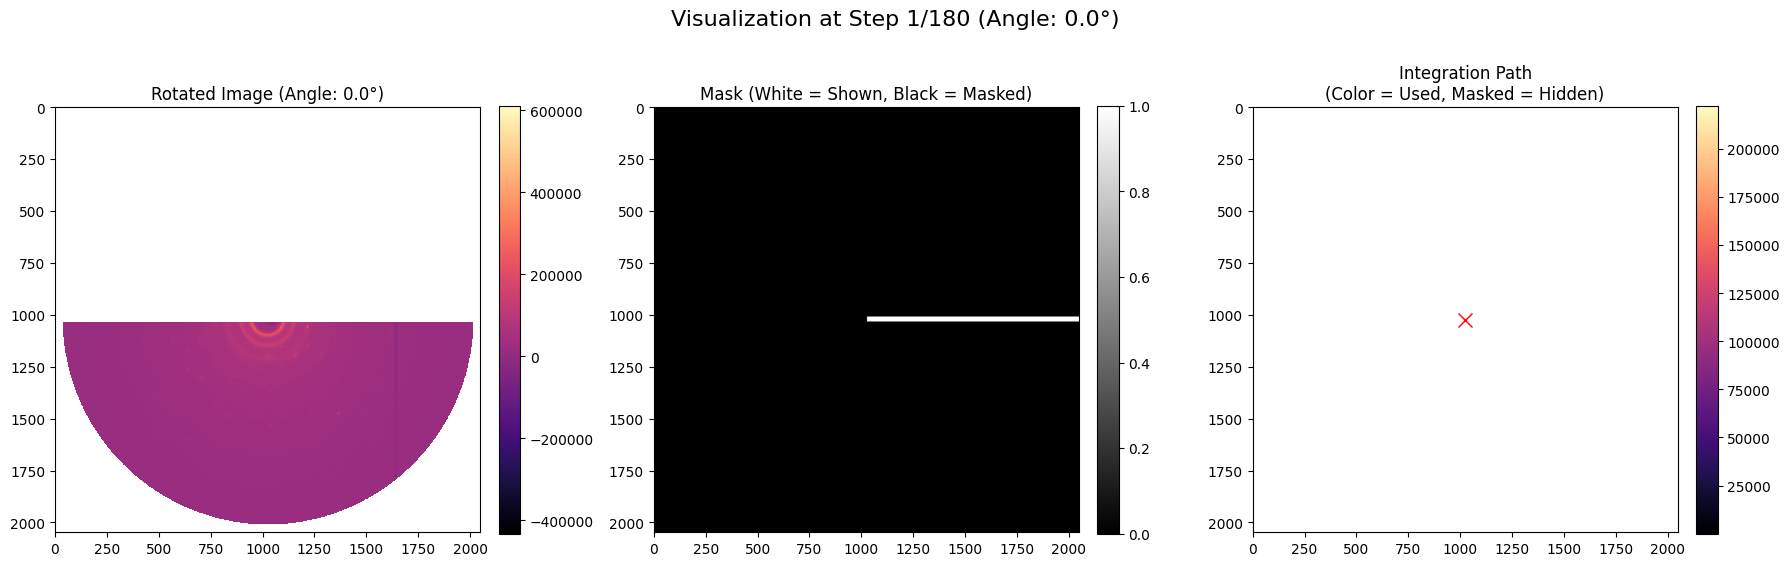

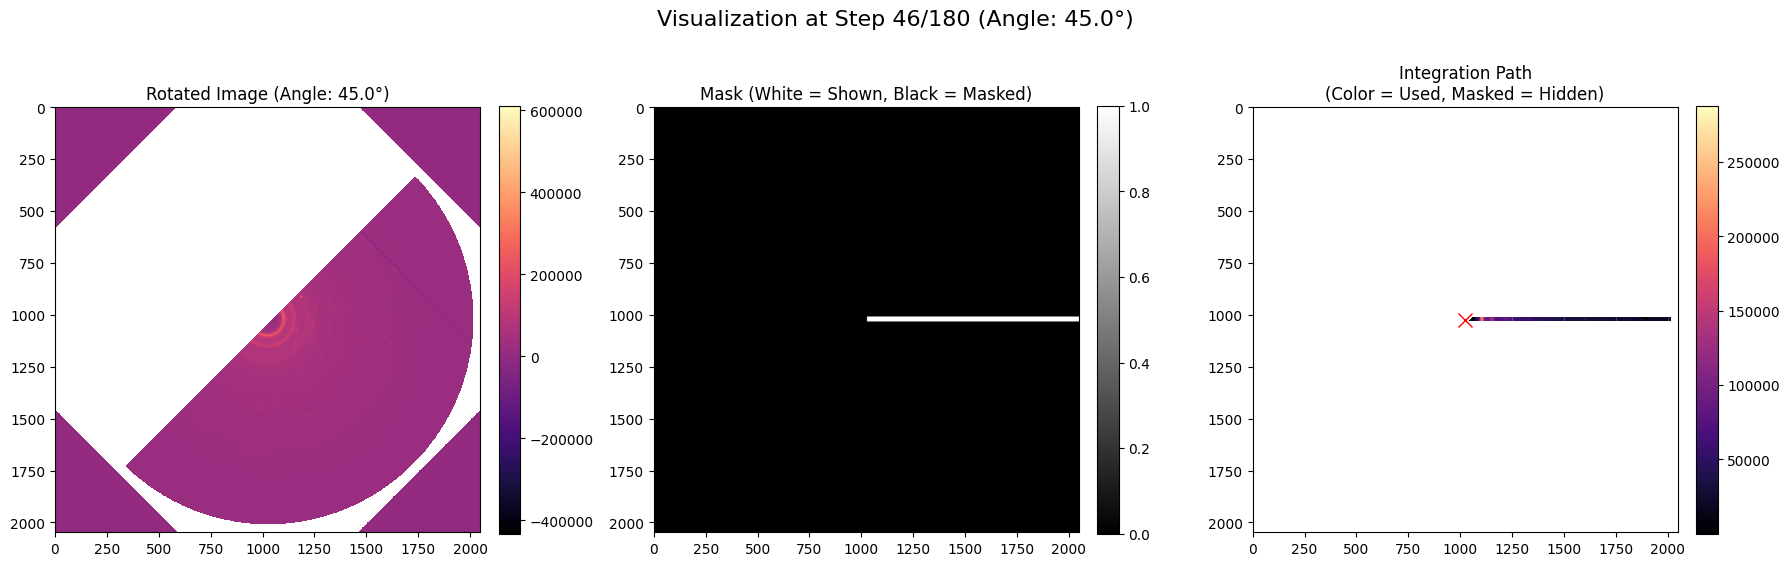

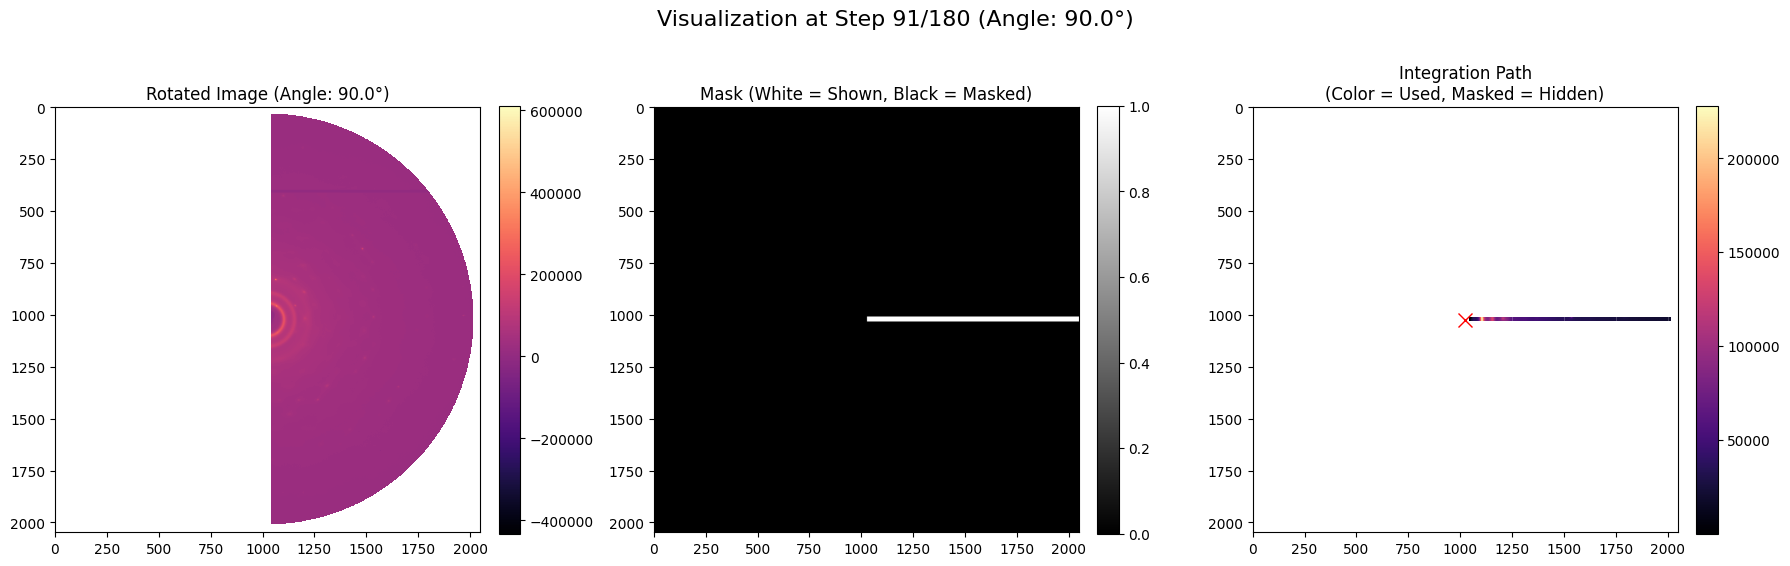

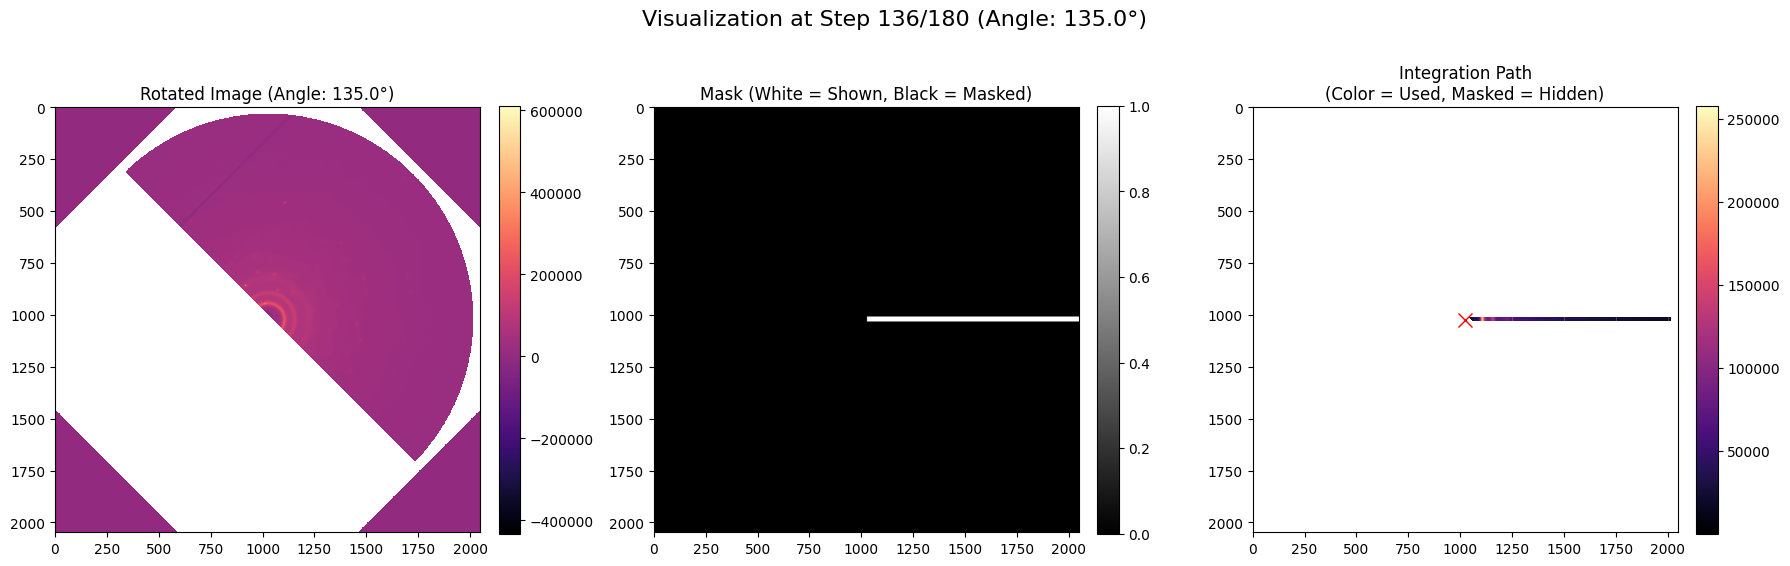

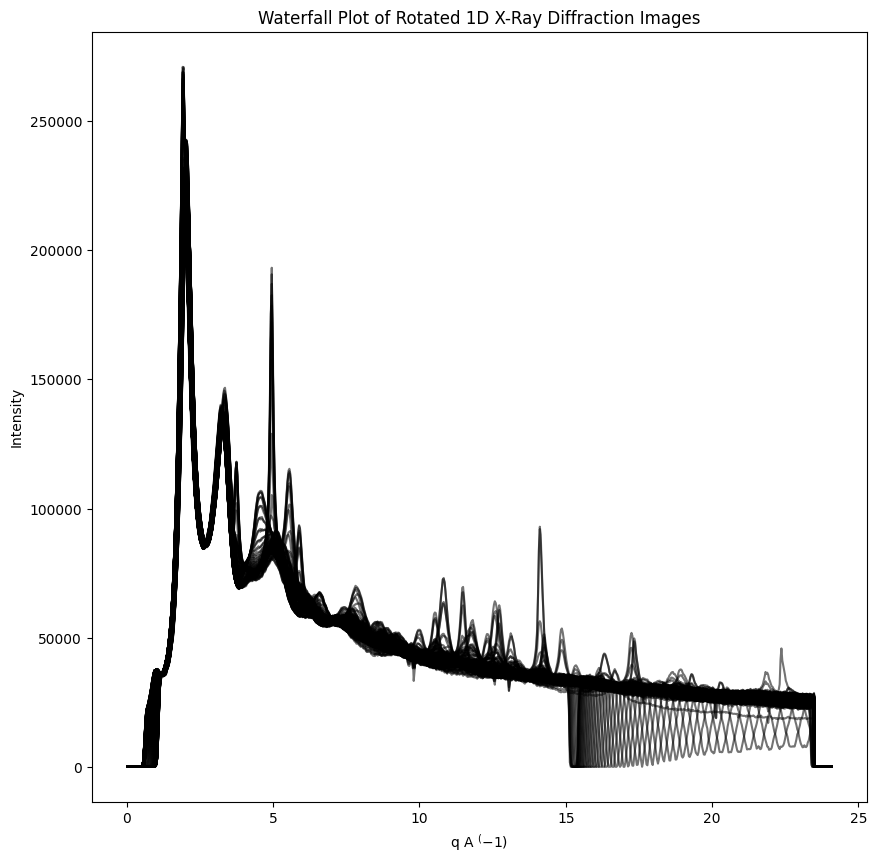

In [21]:
q, GST_6C_real_0035_int_fill = sim.rotate_and_integrate_printout(gz_shifted_image_filled, 1, .40008, 1.22212e-11, resolution = 800, mask = mask_12, center = None, visualization_interval = 45)

The beta-divergence is:  151599710.0 %
 The final number of components used were 47 

Components shape: (800, 46)


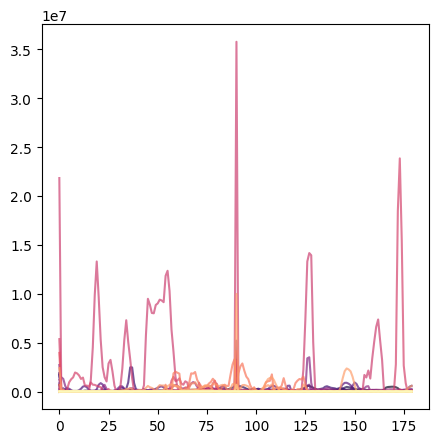

In [22]:
# Run NMF & HAC separately
# Mask rotated 
weights_mask_gz, components_mask_gz, beta_mask_gz = iso.Run_NMF(GST_6C_real_0035_maskint, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_mask_gz.shape}")

Starting NMF algorithm with the following parameters:

Max components: 50
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: random, solver: mu, tol: 1e-06
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has b

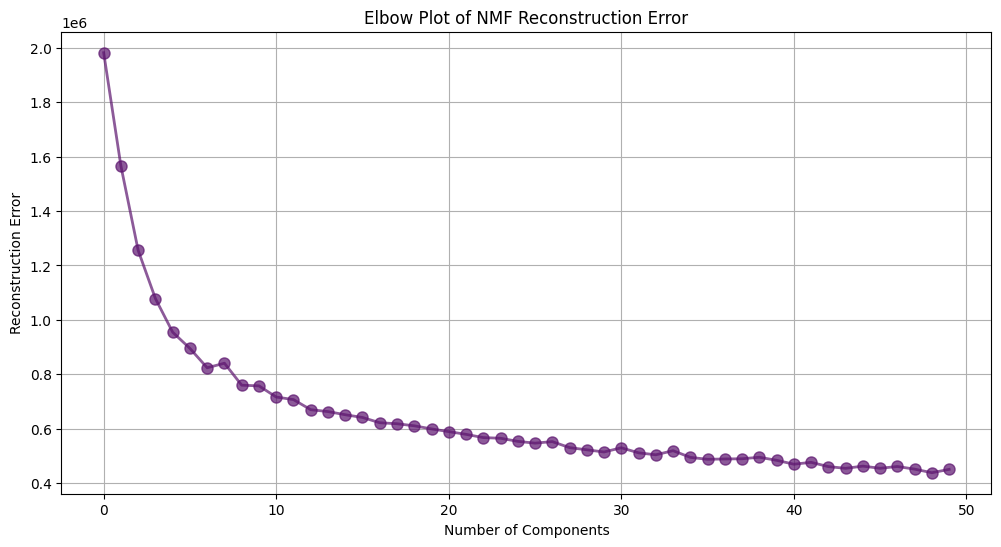

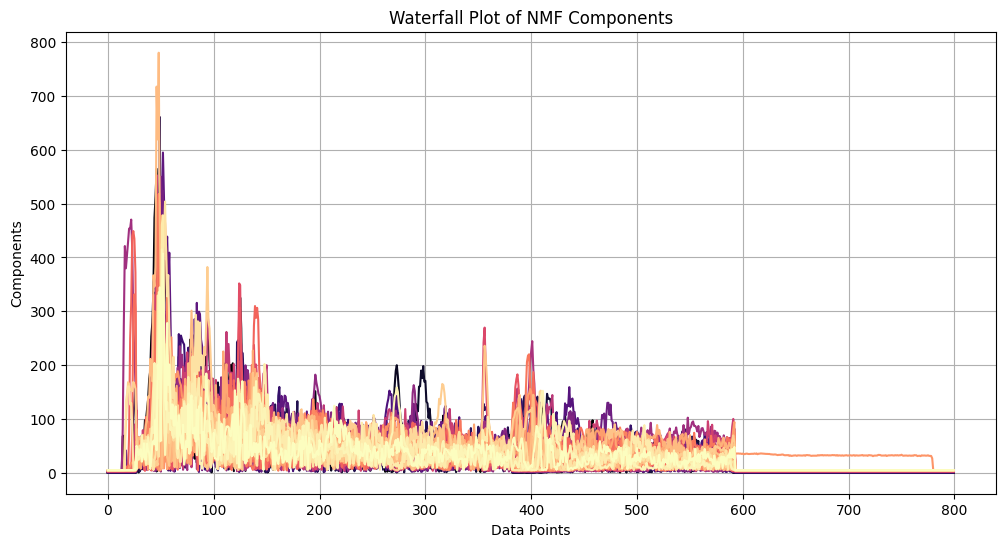

The best number of components is 50


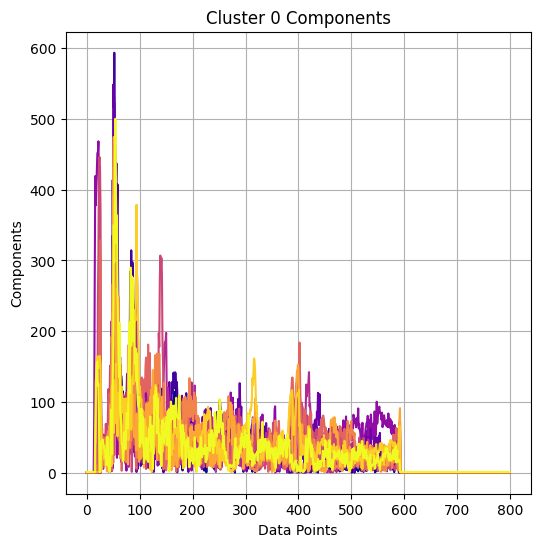

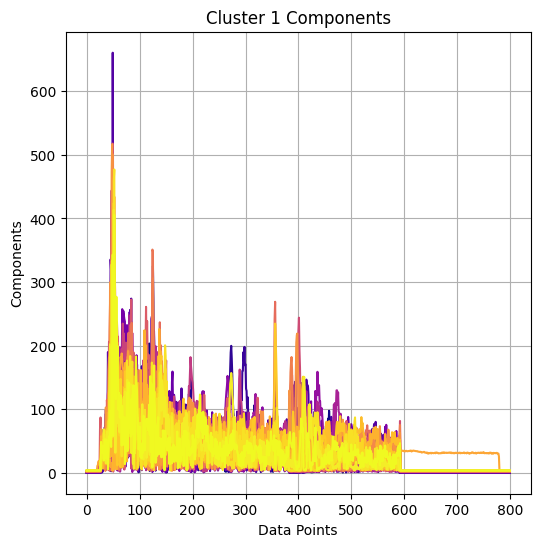

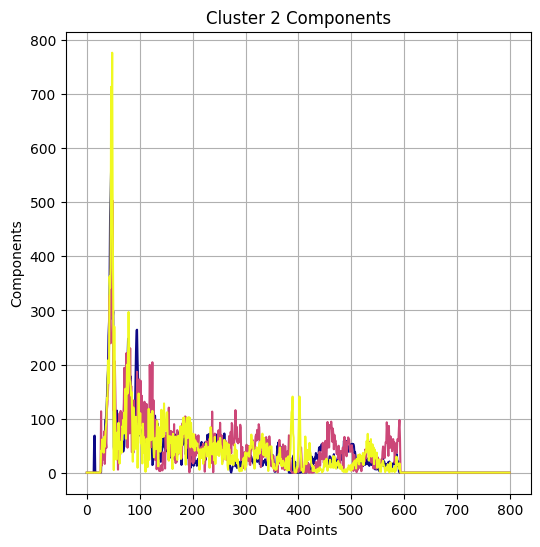

In [27]:
best_W_gz_mask, best_H_gz_mask, best_reconstruction_err_gz_mask = iso.run_sklearn_nmf(GST_6C_real_0035_maskint, max_components = 50, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)
gz_mask_dict = iso.cluster_results_basis(best_W_gz_mask, 3)

The beta-divergence is:  140909550.0 %
 The final number of components used were 20 

Components shape: (800, 19)


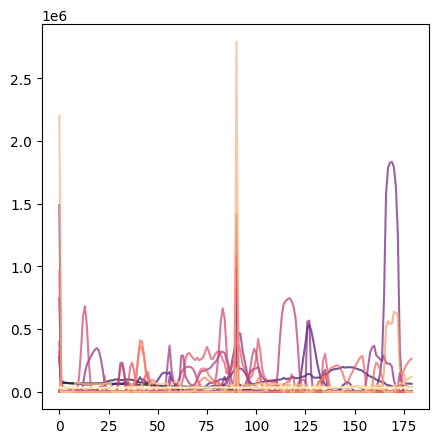

In [23]:
# Run NMF & HAC separately
# Mask rotated 
weights_mask_gz_fill, components_mask_gz_fill, beta_mask_gz_fill = iso.Run_NMF(GST_6C_real_0035_maskint_fill, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_mask_gz_fill.shape}")

Starting NMF algorithm with the following parameters:

Max components: 50
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: mu, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has

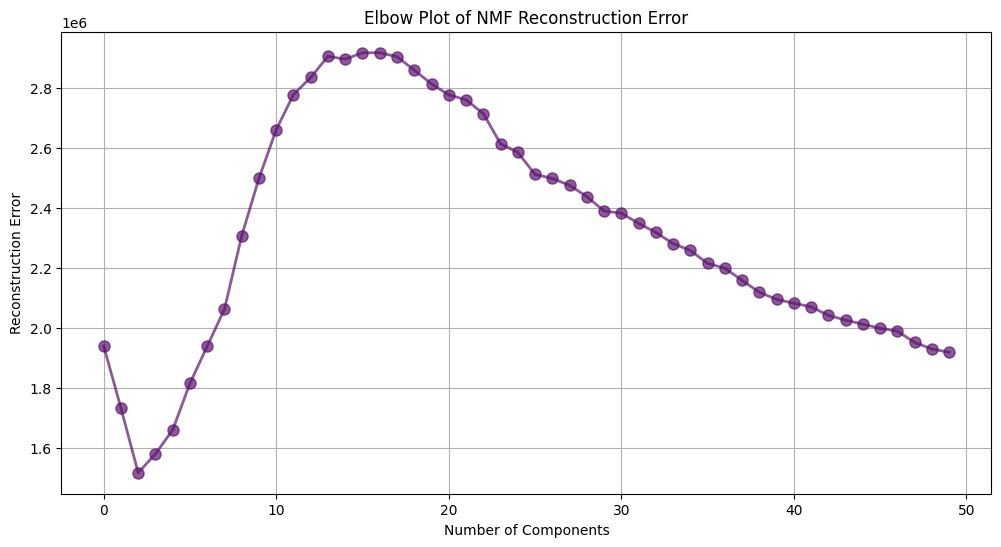

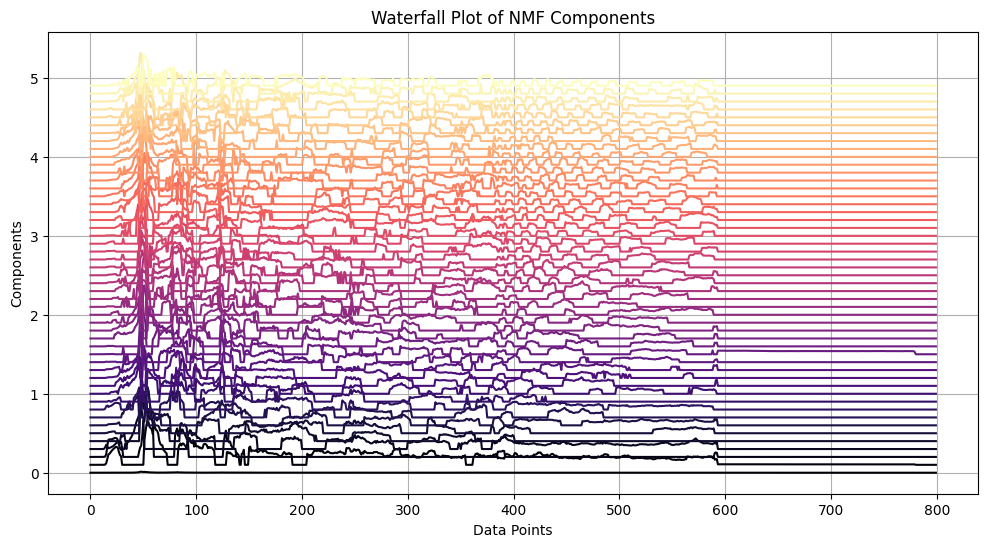

The best number of components is 50


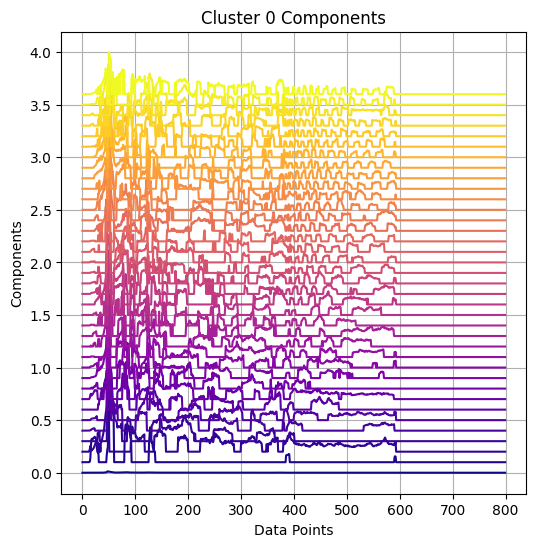

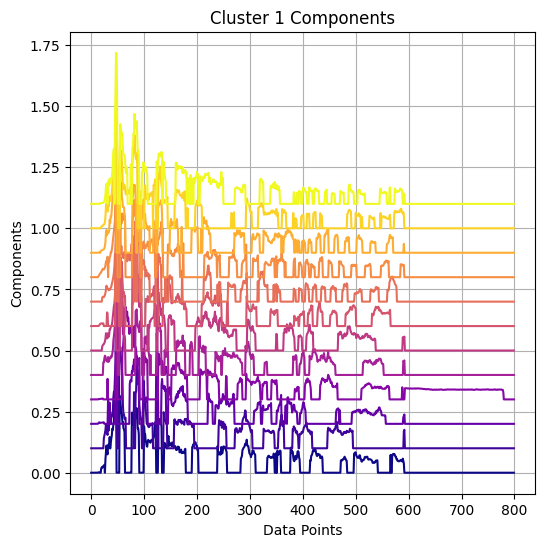

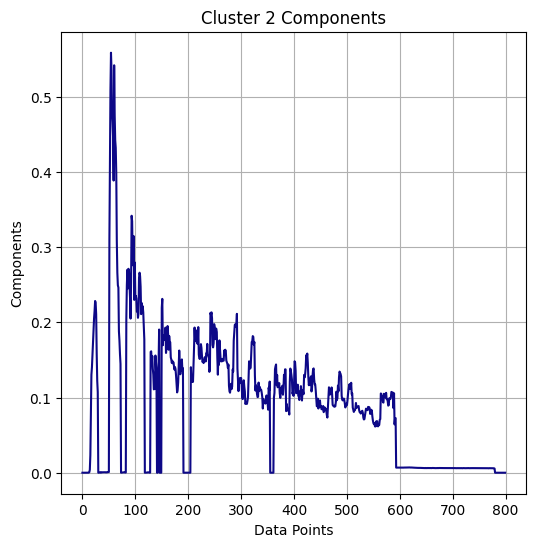

In [28]:
best_W_gz_mask_fill, best_H_gz_mask_fill, best_reconstruction_err_gz_mask_fill = iso.run_sklearn_nmf(GST_6C_real_0035_maskint_fill, max_components = 50, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)
gz_mask_dict_fill = iso.cluster_results_basis(best_W_gz_mask_fill, 3)

The beta-divergence is:  139687890.0 %
 The final number of components used were 44 

Components shape: (800, 43)


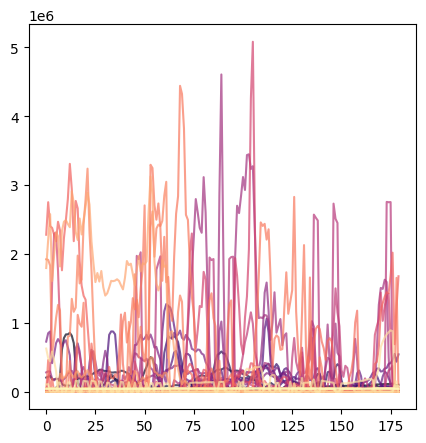

In [24]:
# Run NMF & HAC separately
# Image rotated
weights_gz, components_gz, beta_gz = iso.Run_NMF(GST_6C_real_0035_int, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_gz.shape}")

Starting NMF algorithm with the following parameters:

Max components: 50
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: mu, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

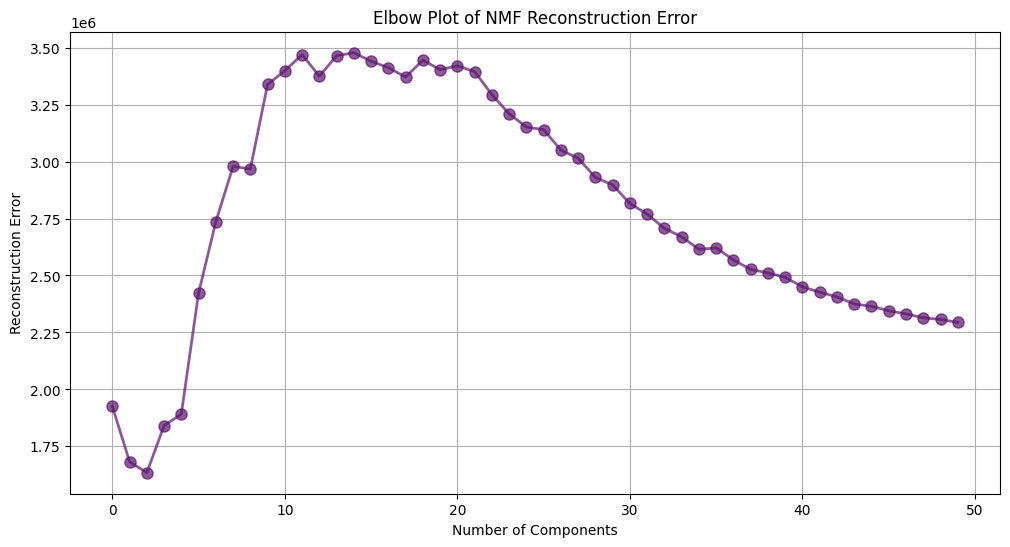

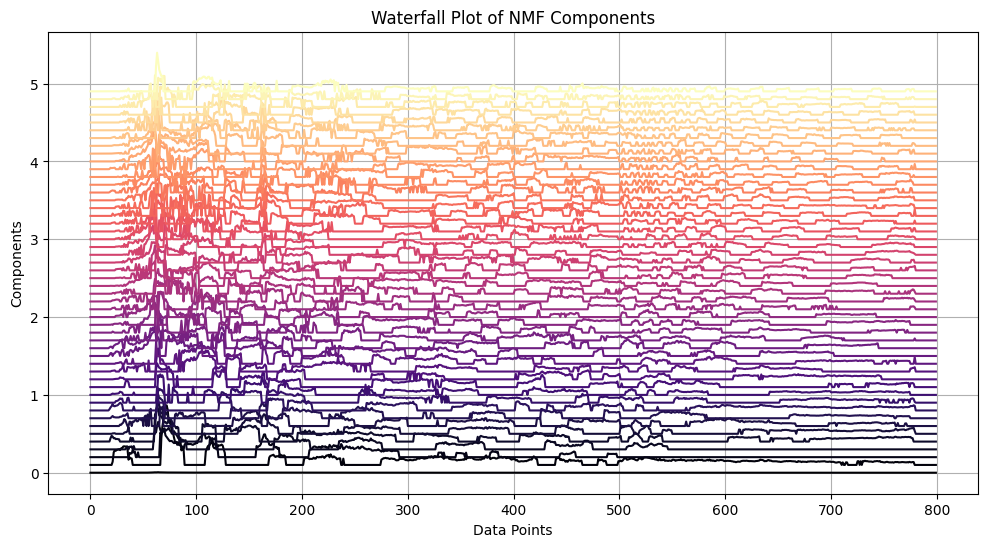

The best number of components is 50


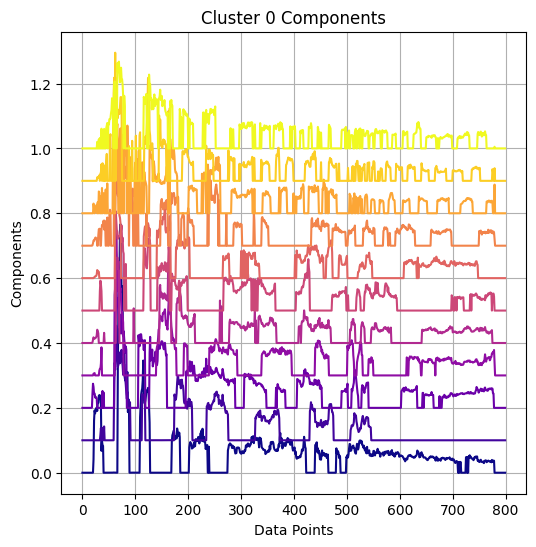

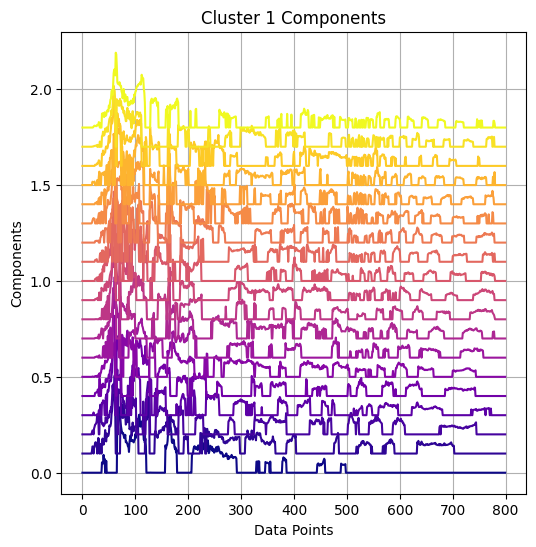

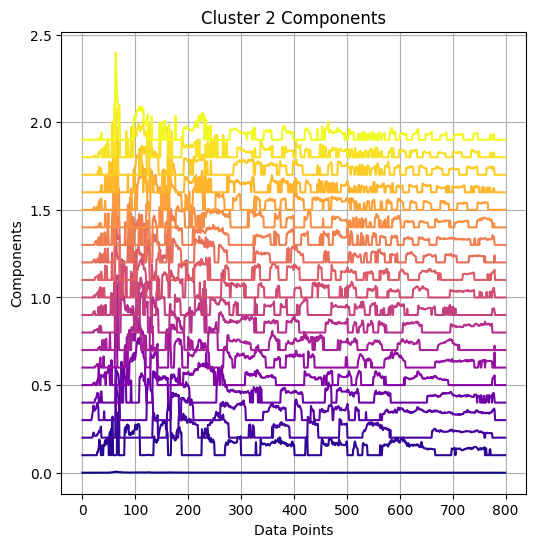

In [29]:
best_W_gz, best_H_gz, best_reconstruction_err_gz = iso.run_sklearn_nmf(GST_6C_real_0035_int, max_components = 50, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)
gz_dict = iso.cluster_results_basis(best_W_gz, 3)

The beta-divergence is:  135614770.0 %
 The final number of components used were 12 

Components shape: (800, 11)


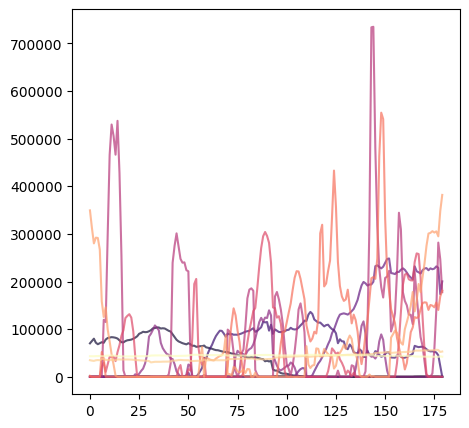

In [25]:
# Run NMF & HAC separately
# Image rotated
weights_gz_fill, components_gz_fill, beta_gz_fill = iso.Run_NMF(GST_6C_real_0035_int_fill, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_gz_fill.shape}")

Starting NMF algorithm with the following parameters:

Max components: 50
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: random, solver: cd, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

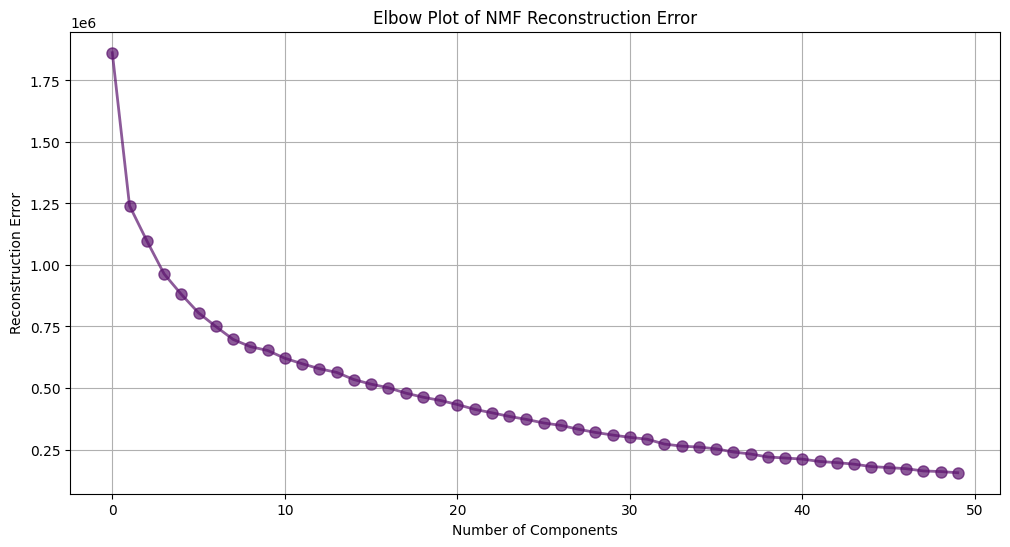

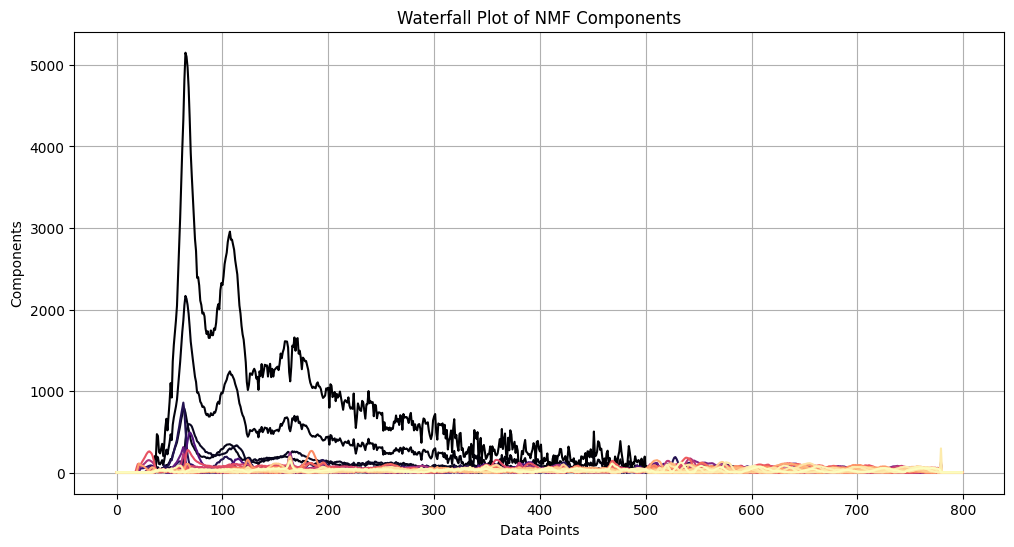

The best number of components is 50


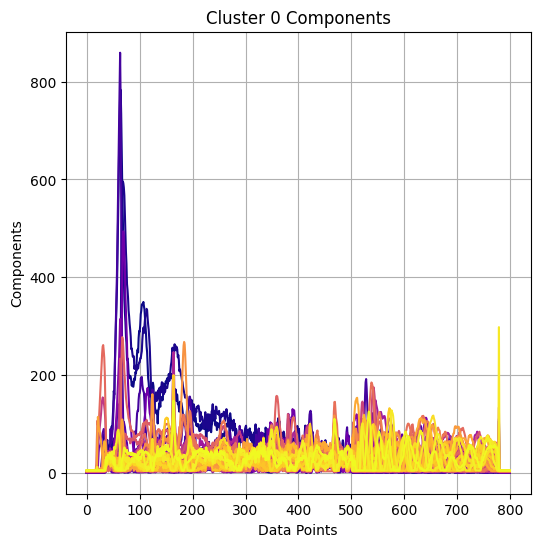

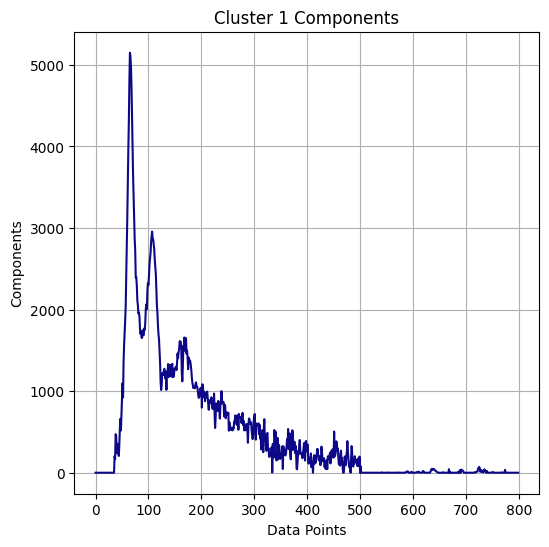

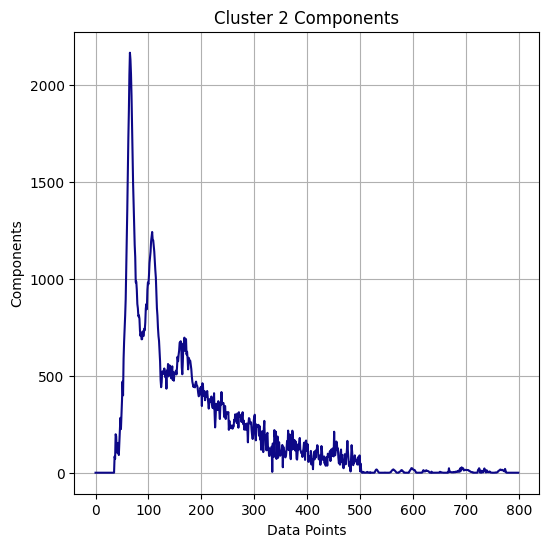

In [30]:
best_W_gz_fill, best_H_gz_fill, best_reconstruction_err_gz_fill = iso.run_sklearn_nmf(GST_6C_real_0035_int_fill, max_components = 50, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)
gz_dict_fill = iso.cluster_results_basis(best_W_gz_fill, 3)

Available columns: ['q_A^-1', 'intensity']

First few rows of data:
     q_A^-1  intensity
0  0.583367   18587.61
1  0.606613   19665.52
2  0.629858   20318.97
3  0.653104   20709.86
4  0.676350   21831.48


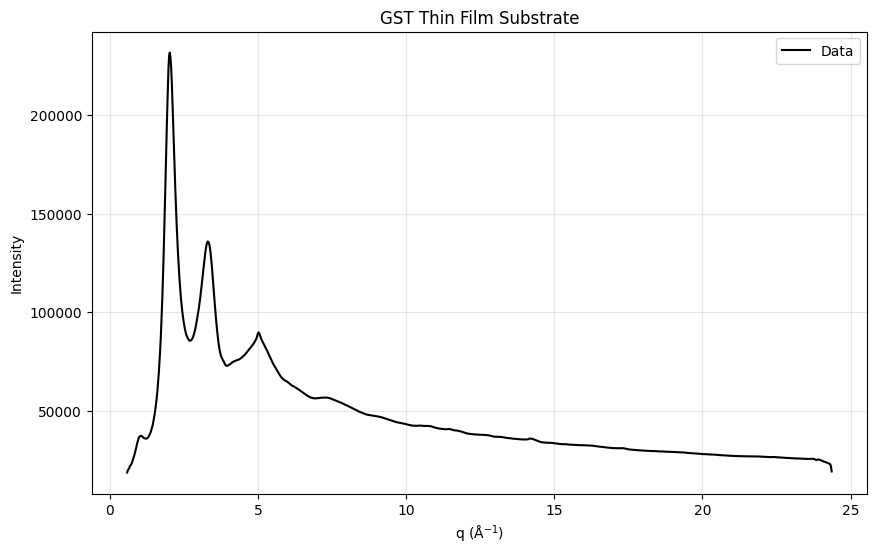

In [26]:
# Load the azimuthal integration CSV file
man_azi_df = pd.read_csv('C:/Users/kelleymarisa/UFL Dropbox/Marisa Kelley/DNA&MDKShare/copy_data_isodat/isodat_data/GST_thinfilm_substrate_manualazi.csv', sep=';')

# Print column names to verify data
print("Available columns:", man_azi_df.columns.tolist())
print("\nFirst few rows of data:")
print(man_azi_df.head())
# Create plot
plt.figure(figsize=(10, 6))
plt.plot(man_azi_df['q_A^-1'], man_azi_df['intensity'], 'k-', label='Data')  # 'k-' means black line
# Customize plot
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('Intensity')
plt.title('GST Thin Film Substrate')
plt.grid(True, alpha=0.3)
plt.legend()
# Show plot
plt.show()